In [1]:
import os
import natsort
from glob import glob
import pandas as pd
import numpy as np
import warnings
import io
import csv
import statistics
from pandas.core.frame import DataFrame
from scipy import io
from scipy.interpolate import splrep, splev
from scipy.stats import skew, kurtosis
from scipy import signal, fftpack
from sys import platform
import xgboost as xgb
from xgboost import *
import lightgbm as lgb
from lightgbm import *
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, QuantileTransformer
from sklearn.metrics import *
from sklearn.metrics import mean_squared_error
from sklearn.svm import LinearSVC, SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import *
from sklearn.ensemble import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import *
from sklearn.linear_model import LogisticRegressionCV, RidgeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import classification_report
from sklearn.feature_selection import VarianceThreshold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV, RidgeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier, RandomForestRegressor
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from lightgbm import LGBMClassifier
from lightgbm import LGBMRegressor
import math
import shap
import tensorflow as tf
import keras.backend as K 
from keras.layers import Dense, LSTM, GRU, SimpleRNN, RNN, Conv1D, Conv2D, Conv3D
from keras.layers import Input, Dropout, Flatten, BatchNormalization, LayerNormalization
from keras.layers import Embedding, Bidirectional
from keras.models import Sequential
from keras import regularizers
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
from keras.optimizers import Adam, SGD, RMSprop
from keras.constraints import MaxNorm
from keras.metrics import mean_absolute_percentage_error, RootMeanSquaredError
from keras.utils import plot_model
from keras.utils import model_to_dot

In [2]:
data_cycle = 'all_condition_stat_cycle_filtered.csv'

In [3]:
data = pd.read_csv('./data/'+data_cycle)
data

,RMS_CF_max,RMS_ACC_mean,RMS_ACC_std,RMS_ACC_median,RMS_ACC_min,RMS_ACC_max,RMS_ACC_skew,RMS_ACC_kurt,RMS_SPINDLE_V_mean,RMS_SPINDLE_V_std,...,SOUND_median,SOUND_min,SOUND_max,SOUND_skew,SOUND_kurt,Ae,Ap,rpm,feed,Milling_Type
0,66.346929,0.244161,0.283664,0.147595,0.005578,1.640208,2.684610,7.875414,74.921787,52.044972,...,0.037162,-0.259393,0.419544,0.255735,-0.168187,1,1.0,3000,300,down
1,66.297981,0.245841,0.264163,0.166304,0.003941,1.631323,2.895762,9.944875,75.527169,52.062288,...,-0.015675,-0.355162,0.402921,0.043373,0.438830,1,1.0,3000,300,down
2,66.577786,0.231463,0.255632,0.150313,0.010979,1.751155,2.908877,10.447245,75.933828,51.175746,...,-0.068800,-0.342743,0.341331,0.139751,-0.499427,1,1.0,3000,300,down
3,66.980319,0.238938,0.260048,0.154622,0.008462,1.843098,2.843921,10.433196,75.827492,51.411571,...,-0.017526,-0.364834,0.332737,0.036950,-0.528745,1,1.0,3000,300,down
4,67.546219,0.242432,0.259848,0.160682,0.007866,1.808103,2.874952,10.639415,75.726991,52.006348,...,-0.060268,-0.388372,0.296290,-0.180871,-0.520753,1,1.0,3000,300,down
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215052,580.818322,3.133201,2.587196,2.310177,0.213215,13.073614,1.431366,1.851970,54.386073,44.422093,...,-0.219265,-2.766058,4.170769,0.553080,0.067663,4,6.0,5000,500,up
215053,582.032368,3.721833,2.669275,3.034522,0.380387,14.117784,1.681629,3.203336,57.948220,42.156799,...,-0.161040,-2.854631,3.320326,0.233940,-0.496502,4,6.0,5000,500,up
215054,583.426041,3.511822,2.444397,2.999400,0.492054,13.476082,1.526276,2.936469,55.148492,43.277311,...,-0.034108,-2.835090,3.020172,0.207604,-0.521229,4,6.0,5000,500,up
215055,580.350537,3.449806,2.239240,3.012830,0.292238,10.928611,1.126394,1.072886,58.075829,45.329429,...,-0.153948,-3.146117,2.982659,0.284559,-0.278496,4,6.0,5000,500,up


In [4]:
groups_type = data.groupby('Milling_Type')

down = groups_type.get_group('down')
down = down.reset_index(drop=True)

up = groups_type.get_group('up')
up = up.reset_index(drop=True)

In [5]:
groups_rpm = down.groupby('rpm')

In [6]:
rpm_3000 = groups_rpm.get_group(3000)
rpm_3000 = rpm_3000.reset_index(drop=True)
rpm_3000 = rpm_3000.drop(['Milling_Type'], axis=1)

rpm_3500 = groups_rpm.get_group(3500)
rpm_3500 = rpm_3500.reset_index(drop=True)
rpm_3500 = rpm_3500.drop(['Milling_Type'], axis=1)

rpm_4000 = groups_rpm.get_group(4000)
rpm_4000 = rpm_4000.reset_index(drop=True)
rpm_4000 = rpm_4000.drop(['Milling_Type'], axis=1)

rpm_4500 = groups_rpm.get_group(4500)
rpm_4500 = rpm_4500.reset_index(drop=True)
rpm_4500 = rpm_4500.drop(['Milling_Type'], axis=1)

rpm_5000 = groups_rpm.get_group(5000)
rpm_5000 = rpm_5000.reset_index(drop=True)
rpm_5000 = rpm_5000.drop(['Milling_Type'], axis=1)

In [7]:
rpm_3000

,RMS_CF_max,RMS_ACC_mean,RMS_ACC_std,RMS_ACC_median,RMS_ACC_min,RMS_ACC_max,RMS_ACC_skew,RMS_ACC_kurt,RMS_SPINDLE_V_mean,RMS_SPINDLE_V_std,...,SOUND_std,SOUND_median,SOUND_min,SOUND_max,SOUND_skew,SOUND_kurt,Ae,Ap,rpm,feed
0,66.346929,0.244161,0.283664,0.147595,0.005578,1.640208,2.684610,7.875414,74.921787,52.044972,...,0.135774,0.037162,-0.259393,0.419544,0.255735,-0.168187,1,1.0,3000,300
1,66.297981,0.245841,0.264163,0.166304,0.003941,1.631323,2.895762,9.944875,75.527169,52.062288,...,0.127980,-0.015675,-0.355162,0.402921,0.043373,0.438830,1,1.0,3000,300
2,66.577786,0.231463,0.255632,0.150313,0.010979,1.751155,2.908877,10.447245,75.933828,51.175746,...,0.133384,-0.068800,-0.342743,0.341331,0.139751,-0.499427,1,1.0,3000,300
3,66.980319,0.238938,0.260048,0.154622,0.008462,1.843098,2.843921,10.433196,75.827492,51.411571,...,0.142687,-0.017526,-0.364834,0.332737,0.036950,-0.528745,1,1.0,3000,300
4,67.546219,0.242432,0.259848,0.160682,0.007866,1.808103,2.874952,10.639415,75.726991,52.006348,...,0.146143,-0.060268,-0.388372,0.296290,-0.180871,-0.520753,1,1.0,3000,300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17387,625.567912,0.548686,0.422034,0.441811,0.034058,2.771965,1.764159,4.444829,66.488841,48.460289,...,1.664944,-0.284103,-3.476311,2.914395,0.075347,-1.010166,4,6.0,3000,500
17388,627.014860,0.541085,0.415541,0.435697,0.002718,2.747039,1.909011,5.228546,66.040408,48.408089,...,1.635614,-0.282497,-3.472045,2.933262,0.026823,-0.987708,4,6.0,3000,500
17389,623.646763,0.501299,0.381546,0.397397,0.032615,2.682410,1.941479,6.245846,65.875328,47.059569,...,1.658669,-0.347808,-3.484182,2.860295,0.043749,-1.004521,4,6.0,3000,500
17390,626.697238,0.602286,0.491180,0.452438,0.028330,3.068670,1.767220,4.293329,66.440678,47.364184,...,1.642589,-0.334709,-3.726398,2.796216,-0.022122,-0.902998,4,6.0,3000,500


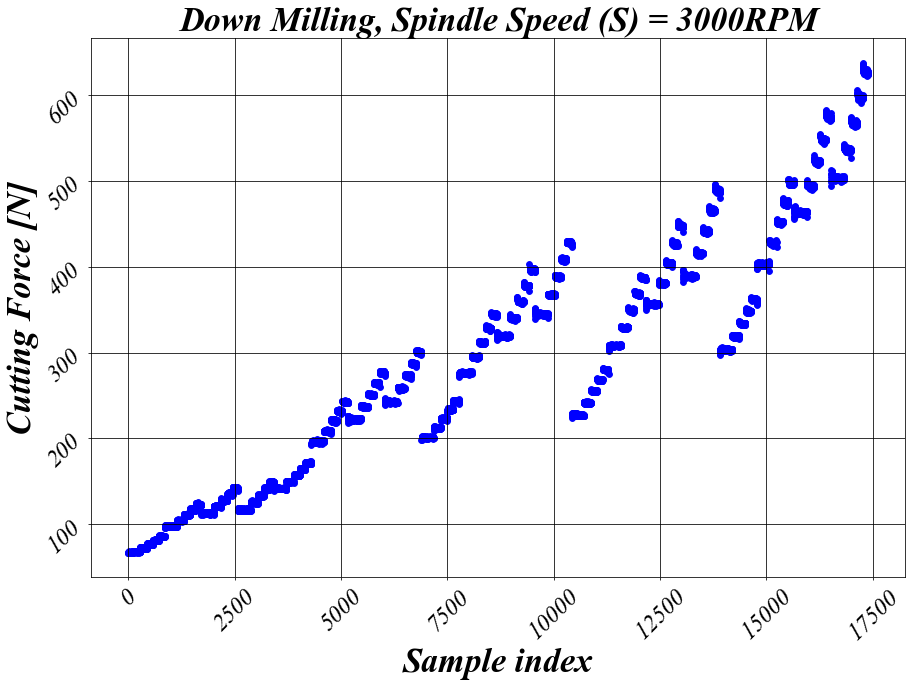

In [8]:
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig = plt.figure(figsize=(15,10),dpi=70)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'italic'
plt.title('Down Milling, Spindle Speed (S) = 3000RPM',**tfont)
plt.scatter(range(0, len(rpm_3000['RMS_CF_max'])), rpm_3000['RMS_CF_max'], label='RMS Fxyz MAX', color = 'blue')
#plt.ylim((50,350))
#plt.scatter(range(0, len(LGBM_test_pred)), LGBM_test_pred, label='Predict Value', color = 'orange')
plt.xlabel(r'Sample index',**lfont)
plt.ylabel(r'Cutting Force [N]',**lfont)
plt.tick_params(labelrotation=45, labelsize=25)
plt.grid(color = 'black')
#plt.legend(fontsize = 35)
plt.show()
#fig.savefig("Down Milling, Cutting Depth (Ap) = 1.00mm.png")

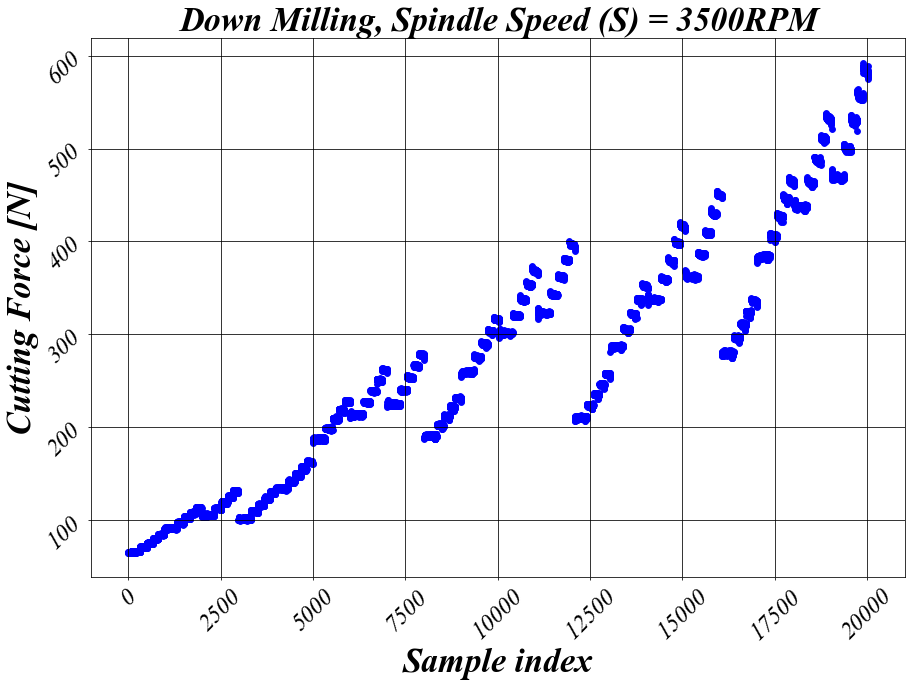

In [9]:
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig = plt.figure(figsize=(15,10),dpi=70)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'italic'
plt.title('Down Milling, Spindle Speed (S) = 3500RPM',**tfont)
plt.scatter(range(0, len(rpm_3500['RMS_CF_max'])), rpm_3500['RMS_CF_max'], label='RMS Fxyz MAX', color = 'blue')
#plt.ylim((50,350))
#plt.scatter(range(0, len(LGBM_test_pred)), LGBM_test_pred, label='Predict Value', color = 'orange')
plt.xlabel(r'Sample index',**lfont)
plt.ylabel(r'Cutting Force [N]',**lfont)
plt.tick_params(labelrotation=45, labelsize=25)
plt.grid(color = 'black')
#plt.legend(fontsize = 35)
plt.show()
#fig.savefig("Down Milling, Cutting Depth (Ap) = 1.00mm.png")

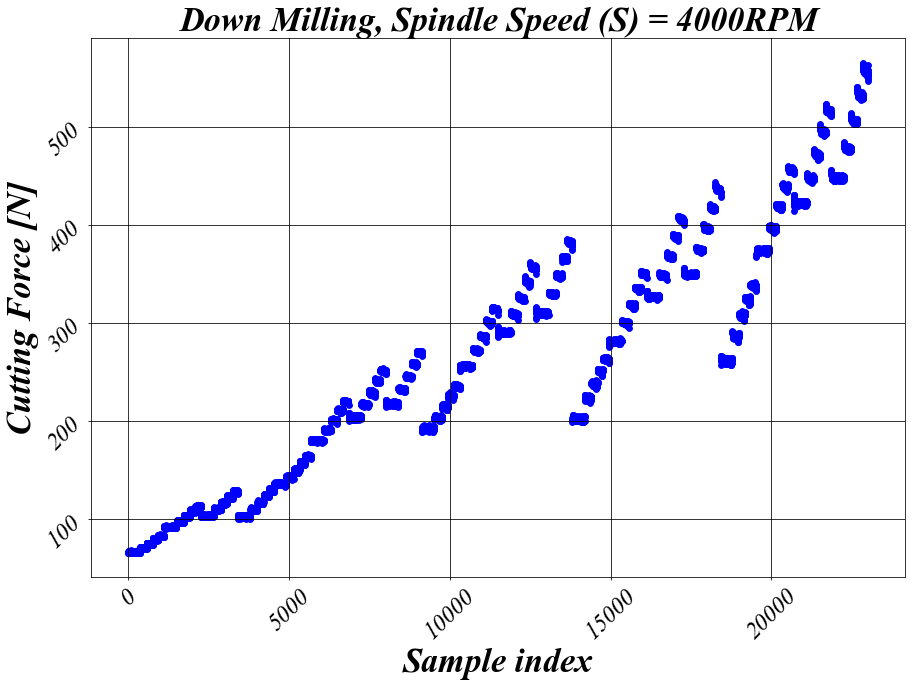

In [10]:
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig = plt.figure(figsize=(15,10),dpi=70)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'italic'
plt.title('Down Milling, Spindle Speed (S) = 4000RPM',**tfont)
plt.scatter(range(0, len(rpm_4000['RMS_CF_max'])), rpm_4000['RMS_CF_max'], label='RMS Fxyz MAX', color = 'blue')
#plt.ylim((50,350))
#plt.scatter(range(0, len(LGBM_test_pred)), LGBM_test_pred, label='Predict Value', color = 'orange')
plt.xlabel(r'Sample index',**lfont)
plt.ylabel(r'Cutting Force [N]',**lfont)
plt.tick_params(labelrotation=45, labelsize=25)
plt.grid(color = 'black')
#plt.legend(fontsize = 35)
plt.show()
#fig.savefig("Down Milling, Cutting Depth (Ap) = 1.00mm.png")

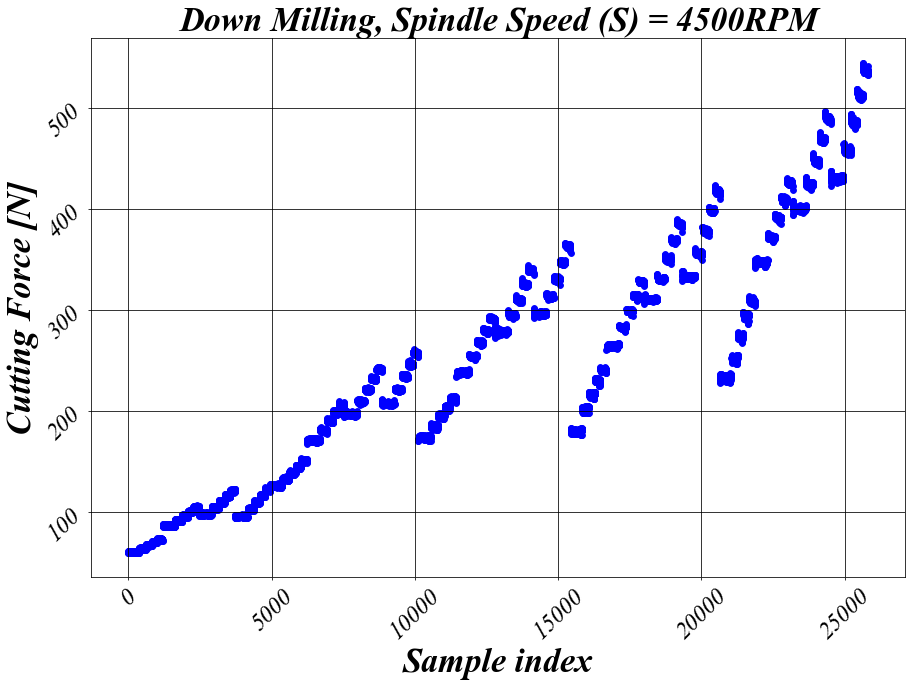

In [11]:
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig = plt.figure(figsize=(15,10),dpi=70)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'italic'
plt.title('Down Milling, Spindle Speed (S) = 4500RPM',**tfont)
plt.scatter(range(0, len(rpm_4500['RMS_CF_max'])), rpm_4500['RMS_CF_max'], label='RMS Fxyz MAX', color = 'blue')
#plt.ylim((50,350))
#plt.scatter(range(0, len(LGBM_test_pred)), LGBM_test_pred, label='Predict Value', color = 'orange')
plt.xlabel(r'Sample index',**lfont)
plt.ylabel(r'Cutting Force [N]',**lfont)
plt.tick_params(labelrotation=45, labelsize=25)
plt.grid(color = 'black')
#plt.legend(fontsize = 35)
plt.show()
#fig.savefig("Down Milling, Cutting Depth (Ap) = 1.00mm.png")

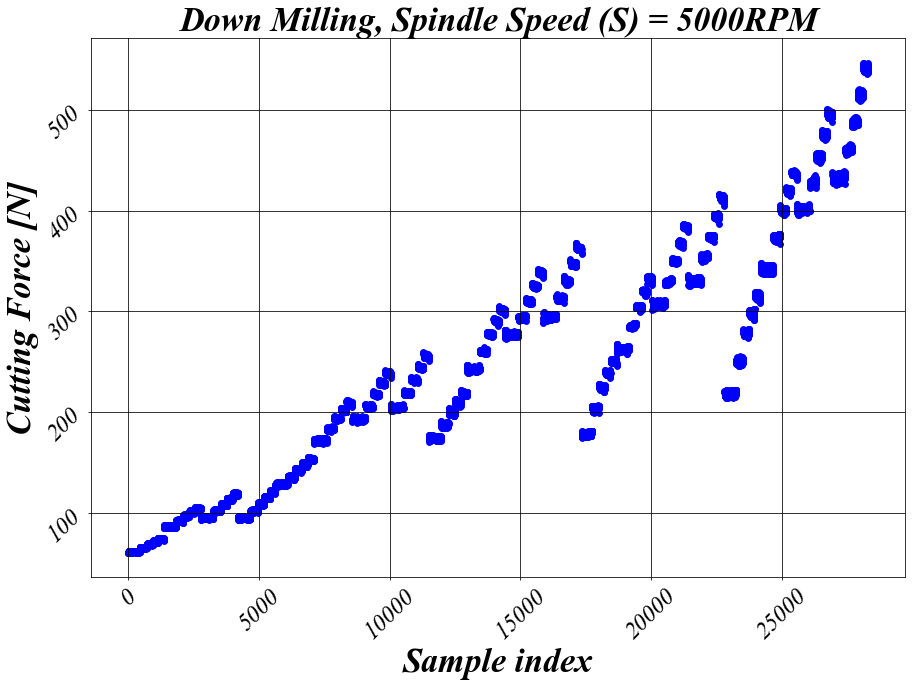

In [12]:
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig = plt.figure(figsize=(15,10),dpi=70)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'italic'
plt.title('Down Milling, Spindle Speed (S) = 5000RPM',**tfont)
plt.scatter(range(0, len(rpm_5000['RMS_CF_max'])), rpm_5000['RMS_CF_max'], label='RMS Fxyz MAX', color = 'blue')
#plt.ylim((50,350))
#plt.scatter(range(0, len(LGBM_test_pred)), LGBM_test_pred, label='Predict Value', color = 'orange')
plt.xlabel(r'Sample index',**lfont)
plt.ylabel(r'Cutting Force [N]',**lfont)
plt.tick_params(labelrotation=45, labelsize=25)
plt.grid(color = 'black')
#plt.legend(fontsize = 35)
plt.show()
#fig.savefig("Down Milling, Cutting Depth (Ap) = 1.00mm.png")

# ***RPM 3000 test***

In [13]:
train = pd.concat([rpm_3500, rpm_4000, rpm_4500, rpm_5000], axis  = 0)
train = train.reset_index(drop=True)
X_train = train.iloc[: , 1:]
y_train = train['RMS_CF_max']

In [14]:
X_test = rpm_3000.iloc[: , 1:]
y_test = rpm_3000['RMS_CF_max']

In [15]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
#X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [16]:
xgb = XGBRegressor(learning_rate = 0.01,
                   n_estimators = 1000,
                   n_jobs  = -1,random_state=42)

eval_set = [(X_train_scaled, y_train), (X_test_scaled, y_test)] # 학습에 사용한 데이터셋과 검증에 사용한 데이터셋

xgb.fit(X_train_scaled, y_train,eval_set=eval_set, eval_metric=['rmse', 'mape'])

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


[0]	validation_0-rmse:280.67856	validation_0-mape:0.98741	validation_1-rmse:317.90074	validation_1-mape:0.99064
[1]	validation_0-rmse:277.88574	validation_0-mape:0.97750	validation_1-rmse:315.57478	validation_1-mape:0.98365
[2]	validation_0-rmse:275.12095	validation_0-mape:0.96769	validation_1-rmse:313.28650	validation_1-mape:0.97684
[3]	validation_0-rmse:272.38391	validation_0-mape:0.95798	validation_1-rmse:311.03053	validation_1-mape:0.97011
[4]	validation_0-rmse:269.67424	validation_0-mape:0.94836	validation_1-rmse:308.80391	validation_1-mape:0.96348
[5]	validation_0-rmse:266.99178	validation_0-mape:0.93884	validation_1-rmse:306.59758	validation_1-mape:0.95689
[6]	validation_0-rmse:264.33702	validation_0-mape:0.92941	validation_1-rmse:304.40198	validation_1-mape:0.95034
[7]	validation_0-rmse:261.70809	validation_0-mape:0.92008	validation_1-rmse:302.24330	validation_1-mape:0.94390
[8]	validation_0-rmse:259.10643	validation_0-mape:0.91084	validation_1-rmse:300.09746	validation_1-mape:

[73]	validation_0-rmse:135.48063	validation_0-mape:0.47241	validation_1-rmse:201.85169	validation_1-mape:0.63654
[74]	validation_0-rmse:134.13956	validation_0-mape:0.46766	validation_1-rmse:200.87256	validation_1-mape:0.63339
[75]	validation_0-rmse:132.81110	validation_0-mape:0.46296	validation_1-rmse:199.79397	validation_1-mape:0.63002
[76]	validation_0-rmse:131.49744	validation_0-mape:0.45830	validation_1-rmse:198.73838	validation_1-mape:0.62663
[77]	validation_0-rmse:130.19636	validation_0-mape:0.45369	validation_1-rmse:197.80081	validation_1-mape:0.62361
[78]	validation_0-rmse:128.90838	validation_0-mape:0.44912	validation_1-rmse:196.73105	validation_1-mape:0.62022
[79]	validation_0-rmse:127.63340	validation_0-mape:0.44460	validation_1-rmse:195.81131	validation_1-mape:0.61725
[80]	validation_0-rmse:126.37117	validation_0-mape:0.44013	validation_1-rmse:194.88797	validation_1-mape:0.61429
[81]	validation_0-rmse:125.12197	validation_0-mape:0.43569	validation_1-rmse:193.98475	validatio

[146]	validation_0-rmse:65.73064	validation_0-mape:0.22569	validation_1-rmse:150.26203	validation_1-mape:0.46581
[147]	validation_0-rmse:65.08580	validation_0-mape:0.22341	validation_1-rmse:149.78891	validation_1-mape:0.46418
[148]	validation_0-rmse:64.44819	validation_0-mape:0.22116	validation_1-rmse:149.31240	validation_1-mape:0.46257
[149]	validation_0-rmse:63.81680	validation_0-mape:0.21893	validation_1-rmse:148.84843	validation_1-mape:0.46097
[150]	validation_0-rmse:63.19127	validation_0-mape:0.21673	validation_1-rmse:148.38115	validation_1-mape:0.45935
[151]	validation_0-rmse:62.57288	validation_0-mape:0.21454	validation_1-rmse:147.92355	validation_1-mape:0.45779
[152]	validation_0-rmse:61.96055	validation_0-mape:0.21238	validation_1-rmse:147.49402	validation_1-mape:0.45630
[153]	validation_0-rmse:61.35450	validation_0-mape:0.21024	validation_1-rmse:147.07350	validation_1-mape:0.45484
[154]	validation_0-rmse:60.75450	validation_0-mape:0.20812	validation_1-rmse:146.63314	validatio

[219]	validation_0-rmse:32.32374	validation_0-mape:0.10778	validation_1-rmse:125.25951	validation_1-mape:0.37965
[220]	validation_0-rmse:32.01698	validation_0-mape:0.10670	validation_1-rmse:124.97754	validation_1-mape:0.37871
[221]	validation_0-rmse:31.71288	validation_0-mape:0.10563	validation_1-rmse:124.81383	validation_1-mape:0.37805
[222]	validation_0-rmse:31.41308	validation_0-mape:0.10457	validation_1-rmse:124.62205	validation_1-mape:0.37735
[223]	validation_0-rmse:31.11523	validation_0-mape:0.10352	validation_1-rmse:124.39746	validation_1-mape:0.37657
[224]	validation_0-rmse:30.82046	validation_0-mape:0.10248	validation_1-rmse:124.16656	validation_1-mape:0.37578
[225]	validation_0-rmse:30.52859	validation_0-mape:0.10145	validation_1-rmse:123.96870	validation_1-mape:0.37505
[226]	validation_0-rmse:30.23953	validation_0-mape:0.10044	validation_1-rmse:123.77231	validation_1-mape:0.37431
[227]	validation_0-rmse:29.95390	validation_0-mape:0.09943	validation_1-rmse:123.55494	validatio

[292]	validation_0-rmse:16.55369	validation_0-mape:0.05240	validation_1-rmse:113.99421	validation_1-mape:0.33809
[293]	validation_0-rmse:16.41253	validation_0-mape:0.05190	validation_1-rmse:113.86559	validation_1-mape:0.33765
[294]	validation_0-rmse:16.27311	validation_0-mape:0.05141	validation_1-rmse:113.73987	validation_1-mape:0.33721
[295]	validation_0-rmse:16.13401	validation_0-mape:0.05093	validation_1-rmse:113.66608	validation_1-mape:0.33690
[296]	validation_0-rmse:15.99649	validation_0-mape:0.05045	validation_1-rmse:113.59800	validation_1-mape:0.33660
[297]	validation_0-rmse:15.86037	validation_0-mape:0.04998	validation_1-rmse:113.46961	validation_1-mape:0.33615
[298]	validation_0-rmse:15.72701	validation_0-mape:0.04951	validation_1-rmse:113.34395	validation_1-mape:0.33571
[299]	validation_0-rmse:15.59391	validation_0-mape:0.04905	validation_1-rmse:113.27405	validation_1-mape:0.33542
[300]	validation_0-rmse:15.46246	validation_0-mape:0.04860	validation_1-rmse:113.20827	validatio

[365]	validation_0-rmse:9.38460	validation_0-mape:0.02788	validation_1-rmse:108.39491	validation_1-mape:0.31775
[366]	validation_0-rmse:9.32201	validation_0-mape:0.02767	validation_1-rmse:108.31797	validation_1-mape:0.31750
[367]	validation_0-rmse:9.26076	validation_0-mape:0.02747	validation_1-rmse:108.24830	validation_1-mape:0.31730
[368]	validation_0-rmse:9.19980	validation_0-mape:0.02727	validation_1-rmse:108.17842	validation_1-mape:0.31707
[369]	validation_0-rmse:9.13956	validation_0-mape:0.02706	validation_1-rmse:108.09352	validation_1-mape:0.31682
[370]	validation_0-rmse:9.07982	validation_0-mape:0.02687	validation_1-rmse:108.02280	validation_1-mape:0.31659
[371]	validation_0-rmse:9.02104	validation_0-mape:0.02667	validation_1-rmse:107.93652	validation_1-mape:0.31633
[372]	validation_0-rmse:8.96264	validation_0-mape:0.02648	validation_1-rmse:107.84861	validation_1-mape:0.31607
[373]	validation_0-rmse:8.90489	validation_0-mape:0.02628	validation_1-rmse:107.78117	validation_1-mape:

[439]	validation_0-rmse:6.38302	validation_0-mape:0.01800	validation_1-rmse:103.84486	validation_1-mape:0.30388
[440]	validation_0-rmse:6.35927	validation_0-mape:0.01793	validation_1-rmse:103.75506	validation_1-mape:0.30365
[441]	validation_0-rmse:6.33532	validation_0-mape:0.01786	validation_1-rmse:103.70650	validation_1-mape:0.30350
[442]	validation_0-rmse:6.31246	validation_0-mape:0.01778	validation_1-rmse:103.67037	validation_1-mape:0.30339
[443]	validation_0-rmse:6.28918	validation_0-mape:0.01771	validation_1-rmse:103.62458	validation_1-mape:0.30325
[444]	validation_0-rmse:6.26744	validation_0-mape:0.01764	validation_1-rmse:103.58648	validation_1-mape:0.30313
[445]	validation_0-rmse:6.24511	validation_0-mape:0.01757	validation_1-rmse:103.54608	validation_1-mape:0.30299
[446]	validation_0-rmse:6.22271	validation_0-mape:0.01750	validation_1-rmse:103.50067	validation_1-mape:0.30286
[447]	validation_0-rmse:6.20050	validation_0-mape:0.01743	validation_1-rmse:103.45949	validation_1-mape:

[513]	validation_0-rmse:5.23390	validation_0-mape:0.01455	validation_1-rmse:101.39381	validation_1-mape:0.29602
[514]	validation_0-rmse:5.22475	validation_0-mape:0.01452	validation_1-rmse:101.37104	validation_1-mape:0.29598
[515]	validation_0-rmse:5.21407	validation_0-mape:0.01450	validation_1-rmse:101.35238	validation_1-mape:0.29591
[516]	validation_0-rmse:5.20495	validation_0-mape:0.01447	validation_1-rmse:101.32316	validation_1-mape:0.29583
[517]	validation_0-rmse:5.19556	validation_0-mape:0.01444	validation_1-rmse:101.28782	validation_1-mape:0.29575
[518]	validation_0-rmse:5.18469	validation_0-mape:0.01442	validation_1-rmse:101.26870	validation_1-mape:0.29569
[519]	validation_0-rmse:5.17571	validation_0-mape:0.01439	validation_1-rmse:101.24319	validation_1-mape:0.29559
[520]	validation_0-rmse:5.16512	validation_0-mape:0.01437	validation_1-rmse:101.22481	validation_1-mape:0.29554
[521]	validation_0-rmse:5.15593	validation_0-mape:0.01434	validation_1-rmse:101.20839	validation_1-mape:

[587]	validation_0-rmse:4.70711	validation_0-mape:0.01323	validation_1-rmse:99.53213	validation_1-mape:0.28964
[588]	validation_0-rmse:4.70198	validation_0-mape:0.01322	validation_1-rmse:99.51654	validation_1-mape:0.28960
[589]	validation_0-rmse:4.69837	validation_0-mape:0.01321	validation_1-rmse:99.51108	validation_1-mape:0.28955
[590]	validation_0-rmse:4.69365	validation_0-mape:0.01320	validation_1-rmse:99.47549	validation_1-mape:0.28948
[591]	validation_0-rmse:4.68976	validation_0-mape:0.01319	validation_1-rmse:99.46404	validation_1-mape:0.28944
[592]	validation_0-rmse:4.68460	validation_0-mape:0.01318	validation_1-rmse:99.44258	validation_1-mape:0.28939
[593]	validation_0-rmse:4.68000	validation_0-mape:0.01317	validation_1-rmse:99.40957	validation_1-mape:0.28932
[594]	validation_0-rmse:4.67503	validation_0-mape:0.01316	validation_1-rmse:99.38937	validation_1-mape:0.28927
[595]	validation_0-rmse:4.67036	validation_0-mape:0.01315	validation_1-rmse:99.36721	validation_1-mape:0.28922
[

[661]	validation_0-rmse:4.43551	validation_0-mape:0.01260	validation_1-rmse:98.03553	validation_1-mape:0.28445
[662]	validation_0-rmse:4.43323	validation_0-mape:0.01259	validation_1-rmse:98.02522	validation_1-mape:0.28442
[663]	validation_0-rmse:4.43071	validation_0-mape:0.01259	validation_1-rmse:98.00633	validation_1-mape:0.28432
[664]	validation_0-rmse:4.42791	validation_0-mape:0.01258	validation_1-rmse:98.01828	validation_1-mape:0.28436
[665]	validation_0-rmse:4.42540	validation_0-mape:0.01257	validation_1-rmse:97.99587	validation_1-mape:0.28425
[666]	validation_0-rmse:4.42295	validation_0-mape:0.01257	validation_1-rmse:97.98520	validation_1-mape:0.28422
[667]	validation_0-rmse:4.41989	validation_0-mape:0.01256	validation_1-rmse:97.97756	validation_1-mape:0.28419
[668]	validation_0-rmse:4.41733	validation_0-mape:0.01255	validation_1-rmse:97.97602	validation_1-mape:0.28418
[669]	validation_0-rmse:4.41445	validation_0-mape:0.01255	validation_1-rmse:97.98688	validation_1-mape:0.28421
[

[735]	validation_0-rmse:4.24290	validation_0-mape:0.01213	validation_1-rmse:96.75473	validation_1-mape:0.28000
[736]	validation_0-rmse:4.24048	validation_0-mape:0.01212	validation_1-rmse:96.74071	validation_1-mape:0.27991
[737]	validation_0-rmse:4.23800	validation_0-mape:0.01211	validation_1-rmse:96.73605	validation_1-mape:0.27989
[738]	validation_0-rmse:4.23540	validation_0-mape:0.01211	validation_1-rmse:96.69651	validation_1-mape:0.27982
[739]	validation_0-rmse:4.23282	validation_0-mape:0.01210	validation_1-rmse:96.66968	validation_1-mape:0.27978
[740]	validation_0-rmse:4.23105	validation_0-mape:0.01210	validation_1-rmse:96.65750	validation_1-mape:0.27976
[741]	validation_0-rmse:4.22817	validation_0-mape:0.01209	validation_1-rmse:96.64247	validation_1-mape:0.27966
[742]	validation_0-rmse:4.22556	validation_0-mape:0.01209	validation_1-rmse:96.60399	validation_1-mape:0.27959
[743]	validation_0-rmse:4.22301	validation_0-mape:0.01208	validation_1-rmse:96.57593	validation_1-mape:0.27954
[

[809]	validation_0-rmse:4.07511	validation_0-mape:0.01171	validation_1-rmse:96.03853	validation_1-mape:0.27779
[810]	validation_0-rmse:4.07284	validation_0-mape:0.01170	validation_1-rmse:96.03114	validation_1-mape:0.27771
[811]	validation_0-rmse:4.07130	validation_0-mape:0.01170	validation_1-rmse:96.03217	validation_1-mape:0.27771
[812]	validation_0-rmse:4.06939	validation_0-mape:0.01169	validation_1-rmse:96.02903	validation_1-mape:0.27770
[813]	validation_0-rmse:4.06707	validation_0-mape:0.01169	validation_1-rmse:96.02586	validation_1-mape:0.27770
[814]	validation_0-rmse:4.06527	validation_0-mape:0.01168	validation_1-rmse:96.01303	validation_1-mape:0.27767
[815]	validation_0-rmse:4.06348	validation_0-mape:0.01168	validation_1-rmse:96.01168	validation_1-mape:0.27767
[816]	validation_0-rmse:4.06177	validation_0-mape:0.01167	validation_1-rmse:96.01056	validation_1-mape:0.27766
[817]	validation_0-rmse:4.05931	validation_0-mape:0.01167	validation_1-rmse:96.00526	validation_1-mape:0.27763
[

[883]	validation_0-rmse:3.94139	validation_0-mape:0.01136	validation_1-rmse:95.67792	validation_1-mape:0.27646
[884]	validation_0-rmse:3.94009	validation_0-mape:0.01136	validation_1-rmse:95.67343	validation_1-mape:0.27644
[885]	validation_0-rmse:3.93863	validation_0-mape:0.01135	validation_1-rmse:95.66288	validation_1-mape:0.27640
[886]	validation_0-rmse:3.93635	validation_0-mape:0.01135	validation_1-rmse:95.66256	validation_1-mape:0.27640
[887]	validation_0-rmse:3.93482	validation_0-mape:0.01135	validation_1-rmse:95.65654	validation_1-mape:0.27638
[888]	validation_0-rmse:3.93316	validation_0-mape:0.01134	validation_1-rmse:95.65198	validation_1-mape:0.27637
[889]	validation_0-rmse:3.93178	validation_0-mape:0.01134	validation_1-rmse:95.64343	validation_1-mape:0.27634
[890]	validation_0-rmse:3.93050	validation_0-mape:0.01133	validation_1-rmse:95.63762	validation_1-mape:0.27631
[891]	validation_0-rmse:3.92876	validation_0-mape:0.01133	validation_1-rmse:95.62254	validation_1-mape:0.27626
[

[957]	validation_0-rmse:3.81726	validation_0-mape:0.01103	validation_1-rmse:95.25219	validation_1-mape:0.27495
[958]	validation_0-rmse:3.81597	validation_0-mape:0.01103	validation_1-rmse:95.24994	validation_1-mape:0.27495
[959]	validation_0-rmse:3.81420	validation_0-mape:0.01102	validation_1-rmse:95.23752	validation_1-mape:0.27492
[960]	validation_0-rmse:3.81284	validation_0-mape:0.01102	validation_1-rmse:95.24076	validation_1-mape:0.27492
[961]	validation_0-rmse:3.81098	validation_0-mape:0.01102	validation_1-rmse:95.23114	validation_1-mape:0.27485
[962]	validation_0-rmse:3.80923	validation_0-mape:0.01101	validation_1-rmse:95.22144	validation_1-mape:0.27479
[963]	validation_0-rmse:3.80681	validation_0-mape:0.01101	validation_1-rmse:95.20351	validation_1-mape:0.27473
[964]	validation_0-rmse:3.80493	validation_0-mape:0.01100	validation_1-rmse:95.20312	validation_1-mape:0.27472
[965]	validation_0-rmse:3.80361	validation_0-mape:0.01100	validation_1-rmse:95.20124	validation_1-mape:0.27472
[

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [17]:
XGB_train_pred = xgb.predict(X_train_scaled)
XGB_test_pred = xgb.predict(X_test_scaled)

print('Train RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_train, XGB_train_pred))))
print('Train MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_train, XGB_train_pred)))

print('Test RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_test, XGB_test_pred))))
print('Test MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_test, XGB_test_pred)))

Train RMSE: 3.7514
Train MAPE: 1.0867
Test RMSE: 94.9358
Test MAPE: 27.3712


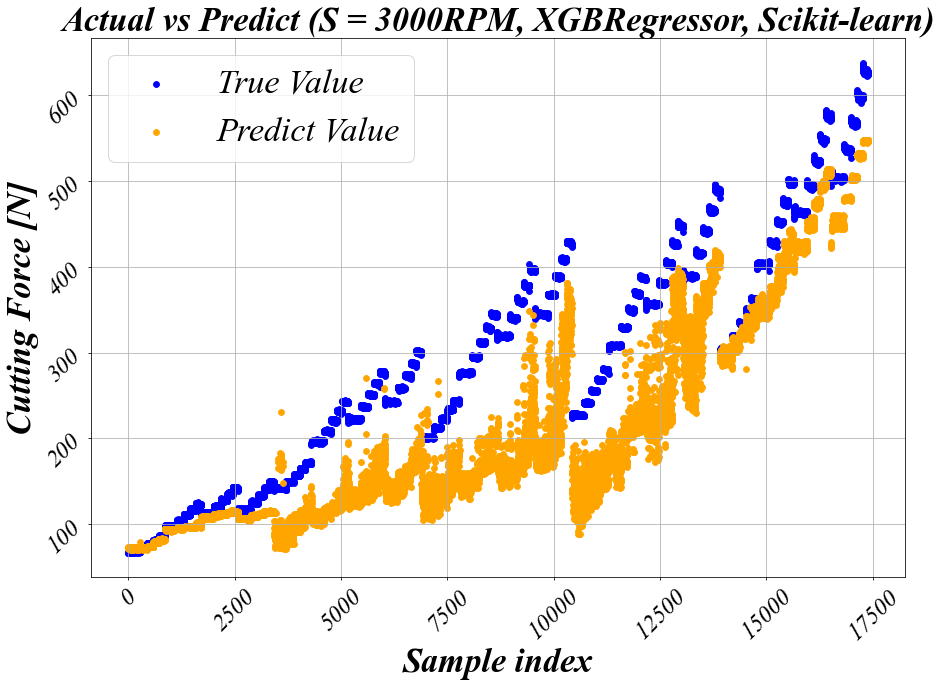

In [18]:
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig = plt.figure(figsize=(15,10),dpi=70)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'italic'
plt.title('Actual vs Predict (S = 3000RPM, XGBRegressor, Scikit-learn)',**tfont)
plt.scatter(range(0, len(y_test)), y_test, label='True Value', color = 'blue')
#plt.ylim((0,300))
plt.scatter(range(0, len(XGB_test_pred)), XGB_test_pred, label='Predict Value', color = 'orange')
plt.xlabel(r'Sample index',**lfont)
plt.ylabel(r'Cutting Force [N]',**lfont)
plt.tick_params(labelrotation=45, labelsize=25)
plt.grid()
plt.legend(fontsize = 35)
plt.show()

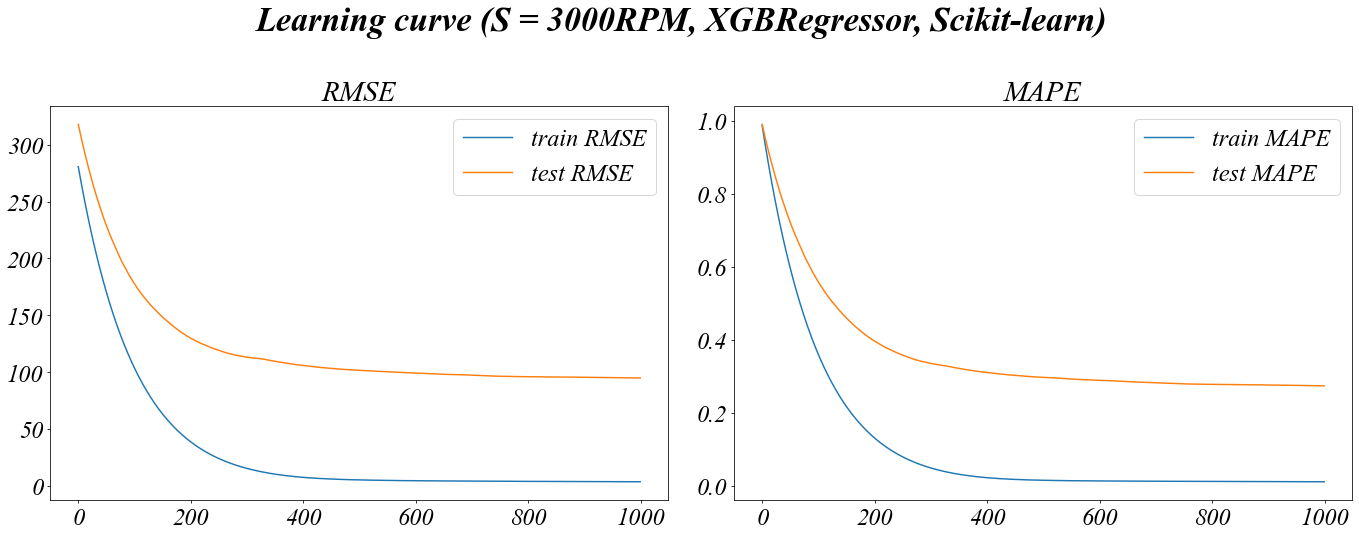

In [19]:
results = xgb.evals_result() # 학습 결과 가져오기


train_rmse = results['validation_0']['rmse']
test_rmse = results['validation_1']['rmse']

train_mape = results['validation_0']['mape']
test_mape = results['validation_1']['mape']

#학습곡선 그리기
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8),dpi=70)

ax[0].set_title("RMSE")
ax[1].set_title("MAPE")

ax[0].plot(train_rmse, label='train RMSE')
ax[0].plot(test_rmse, label='test RMSE')
ax[0].legend()

ax[1].plot(train_mape, label='train MAPE')
ax[1].plot(test_mape, label='test MAPE')
ax[1].legend()

fig.suptitle('Learning curve (S = 3000RPM, XGBRegressor, Scikit-learn)',**tfont)
fig.tight_layout() # 사용하면 플롯간 여백을 조정해준다. 
plt.show()
fig.savefig("./plot/Learning curve rpm 3000_cycle.png")

# ***RPM 3500 test***

In [20]:
train = pd.concat([rpm_3000, rpm_4000, rpm_4500, rpm_5000], axis  = 0)
train = train.reset_index(drop=True)
X_train = train.iloc[: , 1:]
y_train = train['RMS_CF_max']

In [21]:
X_test = rpm_3500.iloc[: , 1:]
y_test = rpm_3500['RMS_CF_max']

In [22]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
#X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [23]:
xgb = XGBRegressor(learning_rate = 0.01,
                   n_estimators = 1000,
                   n_jobs  = -1,random_state=42)

eval_set = [(X_train_scaled, y_train), (X_test_scaled, y_test)] # 학습에 사용한 데이터셋과 검증에 사용한 데이터셋

xgb.fit(X_train_scaled, y_train,eval_set=eval_set, eval_metric=['rmse', 'mape'])

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


[0]	validation_0-rmse:284.50998	validation_0-mape:0.98741	validation_1-rmse:295.47129	validation_1-mape:0.98666
[1]	validation_0-rmse:281.68649	validation_0-mape:0.97747	validation_1-rmse:292.28783	validation_1-mape:0.97599
[2]	validation_0-rmse:278.88925	validation_0-mape:0.96764	validation_1-rmse:289.08621	validation_1-mape:0.96522
[3]	validation_0-rmse:276.12255	validation_0-mape:0.95790	validation_1-rmse:285.95162	validation_1-mape:0.95472
[4]	validation_0-rmse:273.38080	validation_0-mape:0.94826	validation_1-rmse:282.81421	validation_1-mape:0.94415
[5]	validation_0-rmse:270.66828	validation_0-mape:0.93872	validation_1-rmse:279.73113	validation_1-mape:0.93377
[6]	validation_0-rmse:267.98357	validation_0-mape:0.92926	validation_1-rmse:276.66824	validation_1-mape:0.92345
[7]	validation_0-rmse:265.31854	validation_0-mape:0.91994	validation_1-rmse:273.60458	validation_1-mape:0.91349
[8]	validation_0-rmse:262.68496	validation_0-mape:0.91069	validation_1-rmse:270.61441	validation_1-mape:

[73]	validation_0-rmse:137.42463	validation_0-mape:0.47225	validation_1-rmse:126.73260	validation_1-mape:0.43256
[74]	validation_0-rmse:136.06533	validation_0-mape:0.46750	validation_1-rmse:125.16649	validation_1-mape:0.42733
[75]	validation_0-rmse:134.72056	validation_0-mape:0.46278	validation_1-rmse:123.75297	validation_1-mape:0.42262
[76]	validation_0-rmse:133.38818	validation_0-mape:0.45813	validation_1-rmse:122.15138	validation_1-mape:0.41738
[77]	validation_0-rmse:132.06865	validation_0-mape:0.45352	validation_1-rmse:120.56878	validation_1-mape:0.41222
[78]	validation_0-rmse:130.76501	validation_0-mape:0.44895	validation_1-rmse:119.10352	validation_1-mape:0.40733
[79]	validation_0-rmse:129.47219	validation_0-mape:0.44443	validation_1-rmse:117.62310	validation_1-mape:0.40241
[80]	validation_0-rmse:128.19015	validation_0-mape:0.43996	validation_1-rmse:116.31936	validation_1-mape:0.39800
[81]	validation_0-rmse:126.92536	validation_0-mape:0.43552	validation_1-rmse:114.95894	validatio

[146]	validation_0-rmse:66.70944	validation_0-mape:0.22547	validation_1-rmse:50.51890	validation_1-mape:0.16940
[147]	validation_0-rmse:66.05731	validation_0-mape:0.22319	validation_1-rmse:49.90557	validation_1-mape:0.16721
[148]	validation_0-rmse:65.40991	validation_0-mape:0.22094	validation_1-rmse:49.23555	validation_1-mape:0.16492
[149]	validation_0-rmse:64.76881	validation_0-mape:0.21871	validation_1-rmse:48.59637	validation_1-mape:0.16273
[150]	validation_0-rmse:64.13452	validation_0-mape:0.21651	validation_1-rmse:47.99897	validation_1-mape:0.16058
[151]	validation_0-rmse:63.50731	validation_0-mape:0.21433	validation_1-rmse:47.34973	validation_1-mape:0.15844
[152]	validation_0-rmse:62.88577	validation_0-mape:0.21216	validation_1-rmse:46.77893	validation_1-mape:0.15641
[153]	validation_0-rmse:62.27253	validation_0-mape:0.21002	validation_1-rmse:46.20936	validation_1-mape:0.15436
[154]	validation_0-rmse:61.66308	validation_0-mape:0.20790	validation_1-rmse:45.63923	validation_1-mape:

[220]	validation_0-rmse:32.40373	validation_0-mape:0.10657	validation_1-rmse:25.15675	validation_1-mape:0.08170
[221]	validation_0-rmse:32.09304	validation_0-mape:0.10550	validation_1-rmse:25.07076	validation_1-mape:0.08126
[222]	validation_0-rmse:31.78539	validation_0-mape:0.10444	validation_1-rmse:24.99595	validation_1-mape:0.08084
[223]	validation_0-rmse:31.48097	validation_0-mape:0.10339	validation_1-rmse:24.91799	validation_1-mape:0.08042
[224]	validation_0-rmse:31.17957	validation_0-mape:0.10235	validation_1-rmse:24.85770	validation_1-mape:0.08004
[225]	validation_0-rmse:30.88091	validation_0-mape:0.10132	validation_1-rmse:24.79916	validation_1-mape:0.07966
[226]	validation_0-rmse:30.58579	validation_0-mape:0.10031	validation_1-rmse:24.73673	validation_1-mape:0.07928
[227]	validation_0-rmse:30.29331	validation_0-mape:0.09930	validation_1-rmse:24.68567	validation_1-mape:0.07892
[228]	validation_0-rmse:30.00428	validation_0-mape:0.09830	validation_1-rmse:24.63149	validation_1-mape:

[294]	validation_0-rmse:16.24387	validation_0-mape:0.05065	validation_1-rmse:26.71668	validation_1-mape:0.06987
[295]	validation_0-rmse:16.09885	validation_0-mape:0.05014	validation_1-rmse:26.79242	validation_1-mape:0.06990
[296]	validation_0-rmse:15.95529	validation_0-mape:0.04965	validation_1-rmse:26.86344	validation_1-mape:0.06993
[297]	validation_0-rmse:15.81454	validation_0-mape:0.04916	validation_1-rmse:26.91712	validation_1-mape:0.06993
[298]	validation_0-rmse:15.67420	validation_0-mape:0.04867	validation_1-rmse:26.99672	validation_1-mape:0.06997
[299]	validation_0-rmse:15.53499	validation_0-mape:0.04819	validation_1-rmse:27.07572	validation_1-mape:0.07002
[300]	validation_0-rmse:15.39784	validation_0-mape:0.04771	validation_1-rmse:27.14895	validation_1-mape:0.07007
[301]	validation_0-rmse:15.26183	validation_0-mape:0.04724	validation_1-rmse:27.22165	validation_1-mape:0.07011
[302]	validation_0-rmse:15.12822	validation_0-mape:0.04678	validation_1-rmse:27.28760	validation_1-mape:

[368]	validation_0-rmse:8.89417	validation_0-mape:0.02519	validation_1-rmse:31.51226	validation_1-mape:0.07583
[369]	validation_0-rmse:8.83144	validation_0-mape:0.02497	validation_1-rmse:31.56135	validation_1-mape:0.07593
[370]	validation_0-rmse:8.76974	validation_0-mape:0.02476	validation_1-rmse:31.61254	validation_1-mape:0.07601
[371]	validation_0-rmse:8.70845	validation_0-mape:0.02455	validation_1-rmse:31.66367	validation_1-mape:0.07611
[372]	validation_0-rmse:8.64815	validation_0-mape:0.02434	validation_1-rmse:31.71830	validation_1-mape:0.07622
[373]	validation_0-rmse:8.58847	validation_0-mape:0.02414	validation_1-rmse:31.76728	validation_1-mape:0.07631
[374]	validation_0-rmse:8.52920	validation_0-mape:0.02393	validation_1-rmse:31.82255	validation_1-mape:0.07641
[375]	validation_0-rmse:8.47096	validation_0-mape:0.02374	validation_1-rmse:31.87602	validation_1-mape:0.07652
[376]	validation_0-rmse:8.41385	validation_0-mape:0.02354	validation_1-rmse:31.92541	validation_1-mape:0.07661
[

[442]	validation_0-rmse:5.85649	validation_0-mape:0.01506	validation_1-rmse:34.32472	validation_1-mape:0.08187
[443]	validation_0-rmse:5.83250	validation_0-mape:0.01498	validation_1-rmse:34.34406	validation_1-mape:0.08190
[444]	validation_0-rmse:5.80885	validation_0-mape:0.01490	validation_1-rmse:34.36928	validation_1-mape:0.08197
[445]	validation_0-rmse:5.78502	validation_0-mape:0.01483	validation_1-rmse:34.39002	validation_1-mape:0.08202
[446]	validation_0-rmse:5.76174	validation_0-mape:0.01476	validation_1-rmse:34.41632	validation_1-mape:0.08209
[447]	validation_0-rmse:5.73898	validation_0-mape:0.01468	validation_1-rmse:34.44142	validation_1-mape:0.08216
[448]	validation_0-rmse:5.71671	validation_0-mape:0.01461	validation_1-rmse:34.46043	validation_1-mape:0.08221
[449]	validation_0-rmse:5.69502	validation_0-mape:0.01454	validation_1-rmse:34.48566	validation_1-mape:0.08228
[450]	validation_0-rmse:5.67331	validation_0-mape:0.01448	validation_1-rmse:34.51294	validation_1-mape:0.08235
[

[516]	validation_0-rmse:4.69047	validation_0-mape:0.01160	validation_1-rmse:35.69243	validation_1-mape:0.08560
[517]	validation_0-rmse:4.68077	validation_0-mape:0.01158	validation_1-rmse:35.70015	validation_1-mape:0.08563
[518]	validation_0-rmse:4.67176	validation_0-mape:0.01155	validation_1-rmse:35.70639	validation_1-mape:0.08566
[519]	validation_0-rmse:4.66245	validation_0-mape:0.01153	validation_1-rmse:35.71268	validation_1-mape:0.08567
[520]	validation_0-rmse:4.65343	validation_0-mape:0.01150	validation_1-rmse:35.72324	validation_1-mape:0.08571
[521]	validation_0-rmse:4.64404	validation_0-mape:0.01148	validation_1-rmse:35.72839	validation_1-mape:0.08572
[522]	validation_0-rmse:4.63475	validation_0-mape:0.01146	validation_1-rmse:35.73983	validation_1-mape:0.08576
[523]	validation_0-rmse:4.62570	validation_0-mape:0.01144	validation_1-rmse:35.74484	validation_1-mape:0.08578
[524]	validation_0-rmse:4.61667	validation_0-mape:0.01141	validation_1-rmse:35.75514	validation_1-mape:0.08581
[

[590]	validation_0-rmse:4.20434	validation_0-mape:0.01044	validation_1-rmse:36.42295	validation_1-mape:0.08781
[591]	validation_0-rmse:4.19978	validation_0-mape:0.01043	validation_1-rmse:36.42572	validation_1-mape:0.08782
[592]	validation_0-rmse:4.19541	validation_0-mape:0.01042	validation_1-rmse:36.42896	validation_1-mape:0.08783
[593]	validation_0-rmse:4.19049	validation_0-mape:0.01041	validation_1-rmse:36.44189	validation_1-mape:0.08787
[594]	validation_0-rmse:4.18640	validation_0-mape:0.01040	validation_1-rmse:36.44415	validation_1-mape:0.08788
[595]	validation_0-rmse:4.18219	validation_0-mape:0.01039	validation_1-rmse:36.45129	validation_1-mape:0.08790
[596]	validation_0-rmse:4.17823	validation_0-mape:0.01039	validation_1-rmse:36.46097	validation_1-mape:0.08793
[597]	validation_0-rmse:4.17398	validation_0-mape:0.01038	validation_1-rmse:36.47084	validation_1-mape:0.08794
[598]	validation_0-rmse:4.16938	validation_0-mape:0.01037	validation_1-rmse:36.48572	validation_1-mape:0.08801
[

[664]	validation_0-rmse:3.94197	validation_0-mape:0.00992	validation_1-rmse:36.72842	validation_1-mape:0.08899
[665]	validation_0-rmse:3.93943	validation_0-mape:0.00991	validation_1-rmse:36.73874	validation_1-mape:0.08902
[666]	validation_0-rmse:3.93689	validation_0-mape:0.00991	validation_1-rmse:36.73818	validation_1-mape:0.08903
[667]	validation_0-rmse:3.93401	validation_0-mape:0.00990	validation_1-rmse:36.73998	validation_1-mape:0.08904
[668]	validation_0-rmse:3.93166	validation_0-mape:0.00990	validation_1-rmse:36.75701	validation_1-mape:0.08908
[669]	validation_0-rmse:3.92918	validation_0-mape:0.00989	validation_1-rmse:36.75622	validation_1-mape:0.08908
[670]	validation_0-rmse:3.92631	validation_0-mape:0.00989	validation_1-rmse:36.76022	validation_1-mape:0.08909
[671]	validation_0-rmse:3.92362	validation_0-mape:0.00988	validation_1-rmse:36.76983	validation_1-mape:0.08911
[672]	validation_0-rmse:3.92074	validation_0-mape:0.00988	validation_1-rmse:36.77429	validation_1-mape:0.08913
[

[738]	validation_0-rmse:3.78547	validation_0-mape:0.00960	validation_1-rmse:36.90809	validation_1-mape:0.08982
[739]	validation_0-rmse:3.78354	validation_0-mape:0.00960	validation_1-rmse:36.91799	validation_1-mape:0.08985
[740]	validation_0-rmse:3.78191	validation_0-mape:0.00960	validation_1-rmse:36.91647	validation_1-mape:0.08984
[741]	validation_0-rmse:3.78004	validation_0-mape:0.00959	validation_1-rmse:36.92013	validation_1-mape:0.08985
[742]	validation_0-rmse:3.77853	validation_0-mape:0.00959	validation_1-rmse:36.92834	validation_1-mape:0.08987
[743]	validation_0-rmse:3.77674	validation_0-mape:0.00959	validation_1-rmse:36.93234	validation_1-mape:0.08988
[744]	validation_0-rmse:3.77480	validation_0-mape:0.00958	validation_1-rmse:36.94000	validation_1-mape:0.08991
[745]	validation_0-rmse:3.77330	validation_0-mape:0.00958	validation_1-rmse:36.92610	validation_1-mape:0.08990
[746]	validation_0-rmse:3.77188	validation_0-mape:0.00958	validation_1-rmse:36.91837	validation_1-mape:0.08988
[

[812]	validation_0-rmse:3.66410	validation_0-mape:0.00937	validation_1-rmse:36.86693	validation_1-mape:0.09001
[813]	validation_0-rmse:3.66275	validation_0-mape:0.00936	validation_1-rmse:36.86634	validation_1-mape:0.09001
[814]	validation_0-rmse:3.66168	validation_0-mape:0.00936	validation_1-rmse:36.87212	validation_1-mape:0.09002
[815]	validation_0-rmse:3.66015	validation_0-mape:0.00936	validation_1-rmse:36.87229	validation_1-mape:0.09003
[816]	validation_0-rmse:3.65875	validation_0-mape:0.00936	validation_1-rmse:36.88203	validation_1-mape:0.09005
[817]	validation_0-rmse:3.65658	validation_0-mape:0.00935	validation_1-rmse:36.88987	validation_1-mape:0.09007
[818]	validation_0-rmse:3.65545	validation_0-mape:0.00935	validation_1-rmse:36.88596	validation_1-mape:0.09006
[819]	validation_0-rmse:3.65417	validation_0-mape:0.00935	validation_1-rmse:36.88442	validation_1-mape:0.09006
[820]	validation_0-rmse:3.65263	validation_0-mape:0.00934	validation_1-rmse:36.88445	validation_1-mape:0.09006
[

[886]	validation_0-rmse:3.55726	validation_0-mape:0.00915	validation_1-rmse:36.87257	validation_1-mape:0.09029
[887]	validation_0-rmse:3.55608	validation_0-mape:0.00915	validation_1-rmse:36.86596	validation_1-mape:0.09028
[888]	validation_0-rmse:3.55495	validation_0-mape:0.00915	validation_1-rmse:36.86754	validation_1-mape:0.09029
[889]	validation_0-rmse:3.55330	validation_0-mape:0.00914	validation_1-rmse:36.86071	validation_1-mape:0.09027
[890]	validation_0-rmse:3.55206	validation_0-mape:0.00914	validation_1-rmse:36.85139	validation_1-mape:0.09025
[891]	validation_0-rmse:3.55075	validation_0-mape:0.00914	validation_1-rmse:36.84212	validation_1-mape:0.09023
[892]	validation_0-rmse:3.54918	validation_0-mape:0.00913	validation_1-rmse:36.83946	validation_1-mape:0.09022
[893]	validation_0-rmse:3.54793	validation_0-mape:0.00913	validation_1-rmse:36.84406	validation_1-mape:0.09024
[894]	validation_0-rmse:3.54653	validation_0-mape:0.00913	validation_1-rmse:36.84493	validation_1-mape:0.09024
[

[960]	validation_0-rmse:3.45413	validation_0-mape:0.00894	validation_1-rmse:36.75447	validation_1-mape:0.09035
[961]	validation_0-rmse:3.45225	validation_0-mape:0.00894	validation_1-rmse:36.75966	validation_1-mape:0.09036
[962]	validation_0-rmse:3.45086	validation_0-mape:0.00893	validation_1-rmse:36.75815	validation_1-mape:0.09036
[963]	validation_0-rmse:3.44954	validation_0-mape:0.00893	validation_1-rmse:36.75319	validation_1-mape:0.09035
[964]	validation_0-rmse:3.44836	validation_0-mape:0.00893	validation_1-rmse:36.73756	validation_1-mape:0.09033
[965]	validation_0-rmse:3.44719	validation_0-mape:0.00893	validation_1-rmse:36.73361	validation_1-mape:0.09033
[966]	validation_0-rmse:3.44623	validation_0-mape:0.00893	validation_1-rmse:36.73352	validation_1-mape:0.09033
[967]	validation_0-rmse:3.44472	validation_0-mape:0.00892	validation_1-rmse:36.73683	validation_1-mape:0.09034
[968]	validation_0-rmse:3.44378	validation_0-mape:0.00892	validation_1-rmse:36.72833	validation_1-mape:0.09032
[

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [24]:
XGB_train_pred = xgb.predict(X_train_scaled)
XGB_test_pred = xgb.predict(X_test_scaled)

print('Train RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_train, XGB_train_pred))))
print('Train MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_train, XGB_train_pred)))

print('Test RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_test, XGB_test_pred))))
print('Test MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_test, XGB_test_pred)))

Train RMSE: 3.4056
Train MAPE: 0.8840
Test RMSE: 36.6603
Test MAPE: 9.0273


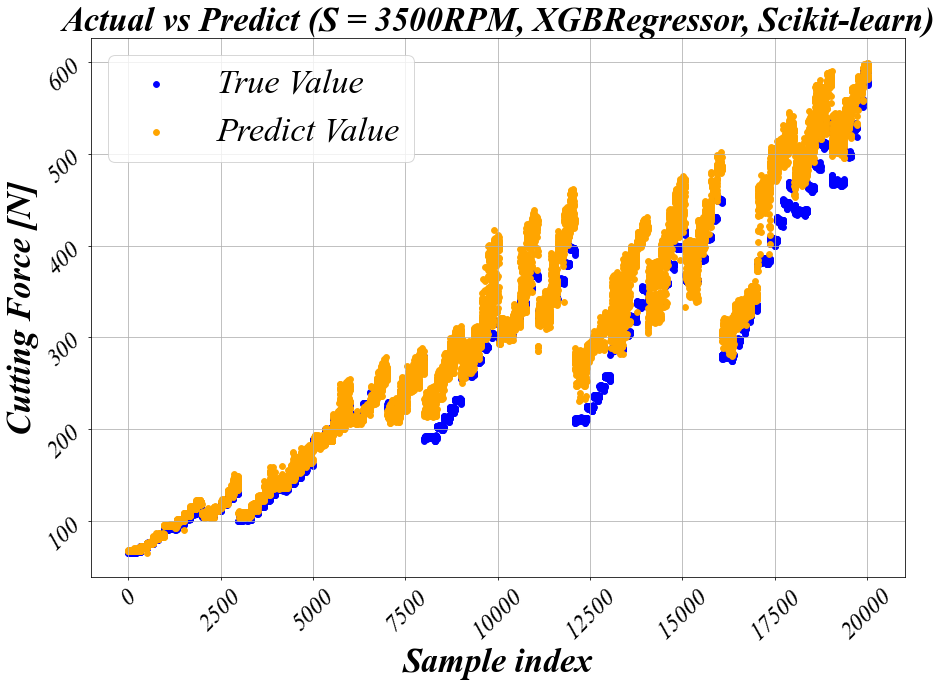

In [25]:
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig = plt.figure(figsize=(15,10),dpi=70)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'italic'
plt.title('Actual vs Predict (S = 3500RPM, XGBRegressor, Scikit-learn)',**tfont)
plt.scatter(range(0, len(y_test)), y_test, label='True Value', color = 'blue')
#plt.ylim((0,300))
plt.scatter(range(0, len(XGB_test_pred)), XGB_test_pred, label='Predict Value', color = 'orange')
plt.xlabel(r'Sample index',**lfont)
plt.ylabel(r'Cutting Force [N]',**lfont)
plt.tick_params(labelrotation=45, labelsize=25)
plt.grid()
plt.legend(fontsize = 35)
plt.show()
#fig.savefig("Bi-directional LSTM Prediction.svg")

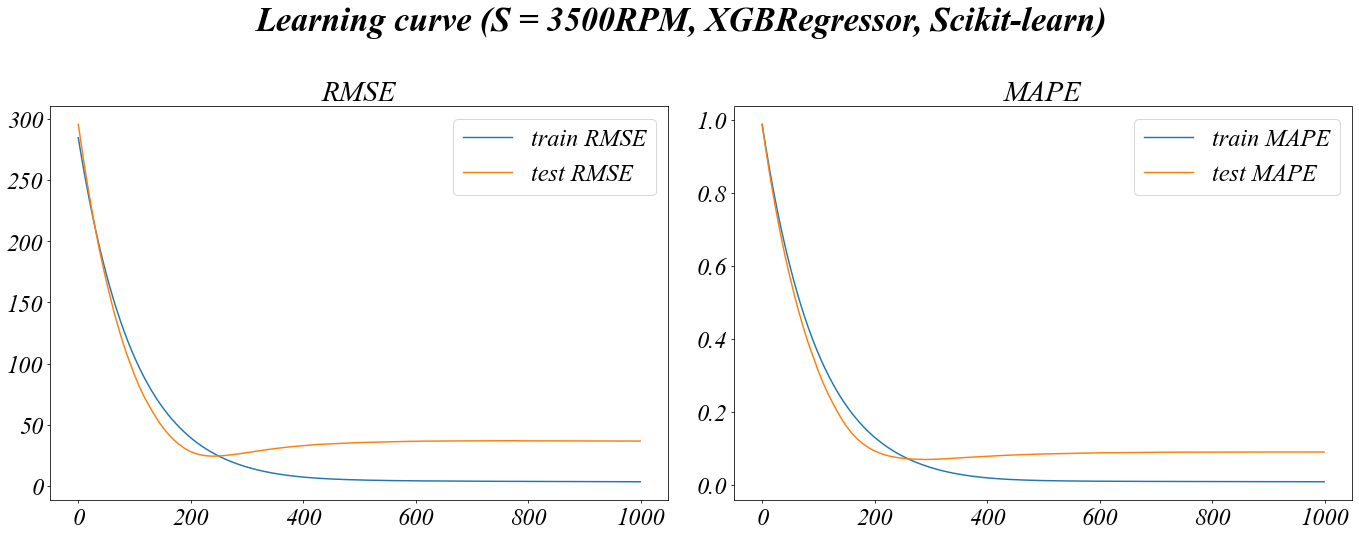

In [26]:
results = xgb.evals_result() # 학습 결과 가져오기


train_rmse = results['validation_0']['rmse']
test_rmse = results['validation_1']['rmse']

train_mape = results['validation_0']['mape']
test_mape = results['validation_1']['mape']

#학습곡선 그리기
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8),dpi=70)

ax[0].set_title("RMSE")
ax[1].set_title("MAPE")

ax[0].plot(train_rmse, label='train RMSE')
ax[0].plot(test_rmse, label='test RMSE')
ax[0].legend()

ax[1].plot(train_mape, label='train MAPE')
ax[1].plot(test_mape, label='test MAPE')
ax[1].legend()

fig.suptitle('Learning curve (S = 3500RPM, XGBRegressor, Scikit-learn)',**tfont)
fig.tight_layout() # 사용하면 플롯간 여백을 조정해준다. 
plt.show()
fig.savefig("./plot/Learning curve rpm 3500_cycle.png")

# ***RPM 4000 test***

In [27]:
train = pd.concat([rpm_3000, rpm_3500, rpm_4500, rpm_5000], axis  = 0)
train = train.reset_index(drop=True)
X_train = train.iloc[: , 1:]
y_train = train['RMS_CF_max']

In [28]:
X_test = rpm_4000.iloc[: , 1:]
y_test = rpm_4000['RMS_CF_max']

In [29]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
#X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [30]:
xgb = XGBRegressor(learning_rate = 0.01,
                   n_estimators = 1000,
                   n_jobs  = -1,random_state=42)

eval_set = [(X_train_scaled, y_train), (X_test_scaled, y_test)] # 학습에 사용한 데이터셋과 검증에 사용한 데이터셋

xgb.fit(X_train_scaled, y_train,eval_set=eval_set, eval_metric=['rmse', 'mape'])

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


[0]	validation_0-rmse:286.12061	validation_0-mape:0.98743	validation_1-rmse:288.04132	validation_1-mape:0.98761
[1]	validation_0-rmse:283.27801	validation_0-mape:0.97750	validation_1-rmse:285.19089	validation_1-mape:0.97777
[2]	validation_0-rmse:280.46417	validation_0-mape:0.96767	validation_1-rmse:282.37131	validation_1-mape:0.96804
[3]	validation_0-rmse:277.67874	validation_0-mape:0.95794	validation_1-rmse:279.55264	validation_1-mape:0.95827
[4]	validation_0-rmse:274.92147	validation_0-mape:0.94831	validation_1-rmse:276.76355	validation_1-mape:0.94864
[5]	validation_0-rmse:272.18846	validation_0-mape:0.93878	validation_1-rmse:273.99567	validation_1-mape:0.93905
[6]	validation_0-rmse:269.48620	validation_0-mape:0.92934	validation_1-rmse:271.25637	validation_1-mape:0.92953
[7]	validation_0-rmse:266.80772	validation_0-mape:0.92001	validation_1-rmse:268.55844	validation_1-mape:0.92018
[8]	validation_0-rmse:264.15939	validation_0-mape:0.91075	validation_1-rmse:265.84918	validation_1-mape:

[73]	validation_0-rmse:138.30407	validation_0-mape:0.47184	validation_1-rmse:140.53597	validation_1-mape:0.47749
[74]	validation_0-rmse:136.93909	validation_0-mape:0.46708	validation_1-rmse:139.29061	validation_1-mape:0.47300
[75]	validation_0-rmse:135.58674	validation_0-mape:0.46237	validation_1-rmse:137.96124	validation_1-mape:0.46833
[76]	validation_0-rmse:134.24839	validation_0-mape:0.45771	validation_1-rmse:136.66758	validation_1-mape:0.46373
[77]	validation_0-rmse:132.92357	validation_0-mape:0.45309	validation_1-rmse:135.50683	validation_1-mape:0.45940
[78]	validation_0-rmse:131.61163	validation_0-mape:0.44852	validation_1-rmse:134.24105	validation_1-mape:0.45491
[79]	validation_0-rmse:130.31290	validation_0-mape:0.44399	validation_1-rmse:133.10494	validation_1-mape:0.45069
[80]	validation_0-rmse:129.02732	validation_0-mape:0.43952	validation_1-rmse:131.84281	validation_1-mape:0.44622
[81]	validation_0-rmse:127.75429	validation_0-mape:0.43508	validation_1-rmse:130.61332	validatio

[146]	validation_0-rmse:67.17892	validation_0-mape:0.22532	validation_1-rmse:74.79765	validation_1-mape:0.24025
[147]	validation_0-rmse:66.52243	validation_0-mape:0.22305	validation_1-rmse:74.16057	validation_1-mape:0.23806
[148]	validation_0-rmse:65.87136	validation_0-mape:0.22080	validation_1-rmse:73.62301	validation_1-mape:0.23603
[149]	validation_0-rmse:65.22805	validation_0-mape:0.21857	validation_1-rmse:72.99945	validation_1-mape:0.23389
[150]	validation_0-rmse:64.58980	validation_0-mape:0.21637	validation_1-rmse:72.44414	validation_1-mape:0.23180
[151]	validation_0-rmse:63.95897	validation_0-mape:0.21419	validation_1-rmse:71.84933	validation_1-mape:0.22969
[152]	validation_0-rmse:63.33398	validation_0-mape:0.21204	validation_1-rmse:71.25548	validation_1-mape:0.22754
[153]	validation_0-rmse:62.71569	validation_0-mape:0.20990	validation_1-rmse:70.67523	validation_1-mape:0.22542
[154]	validation_0-rmse:62.10293	validation_0-mape:0.20779	validation_1-rmse:70.14282	validation_1-mape:

[220]	validation_0-rmse:32.72808	validation_0-mape:0.10669	validation_1-rmse:42.34937	validation_1-mape:0.12450
[221]	validation_0-rmse:32.41713	validation_0-mape:0.10562	validation_1-rmse:42.05587	validation_1-mape:0.12348
[222]	validation_0-rmse:32.10951	validation_0-mape:0.10456	validation_1-rmse:41.76536	validation_1-mape:0.12247
[223]	validation_0-rmse:31.80499	validation_0-mape:0.10351	validation_1-rmse:41.48213	validation_1-mape:0.12151
[224]	validation_0-rmse:31.50376	validation_0-mape:0.10247	validation_1-rmse:41.20077	validation_1-mape:0.12055
[225]	validation_0-rmse:31.20550	validation_0-mape:0.10145	validation_1-rmse:40.92009	validation_1-mape:0.11957
[226]	validation_0-rmse:30.91027	validation_0-mape:0.10043	validation_1-rmse:40.63397	validation_1-mape:0.11860
[227]	validation_0-rmse:30.61802	validation_0-mape:0.09943	validation_1-rmse:40.35748	validation_1-mape:0.11766
[228]	validation_0-rmse:30.32876	validation_0-mape:0.09843	validation_1-rmse:40.06624	validation_1-mape:

[294]	validation_0-rmse:16.64365	validation_0-mape:0.05111	validation_1-rmse:27.23516	validation_1-mape:0.07429
[295]	validation_0-rmse:16.50185	validation_0-mape:0.05062	validation_1-rmse:27.11259	validation_1-mape:0.07390
[296]	validation_0-rmse:16.36141	validation_0-mape:0.05014	validation_1-rmse:26.99032	validation_1-mape:0.07351
[297]	validation_0-rmse:16.22270	validation_0-mape:0.04966	validation_1-rmse:26.87448	validation_1-mape:0.07314
[298]	validation_0-rmse:16.08553	validation_0-mape:0.04918	validation_1-rmse:26.74336	validation_1-mape:0.07274
[299]	validation_0-rmse:15.94963	validation_0-mape:0.04871	validation_1-rmse:26.61628	validation_1-mape:0.07237
[300]	validation_0-rmse:15.81551	validation_0-mape:0.04824	validation_1-rmse:26.49624	validation_1-mape:0.07198
[301]	validation_0-rmse:15.68303	validation_0-mape:0.04778	validation_1-rmse:26.37875	validation_1-mape:0.07162
[302]	validation_0-rmse:15.55184	validation_0-mape:0.04733	validation_1-rmse:26.26371	validation_1-mape:

[368]	validation_0-rmse:9.44325	validation_0-mape:0.02628	validation_1-rmse:21.08942	validation_1-mape:0.05602
[369]	validation_0-rmse:9.38304	validation_0-mape:0.02607	validation_1-rmse:21.03598	validation_1-mape:0.05587
[370]	validation_0-rmse:9.32272	validation_0-mape:0.02587	validation_1-rmse:20.98487	validation_1-mape:0.05571
[371]	validation_0-rmse:9.26375	validation_0-mape:0.02566	validation_1-rmse:20.93460	validation_1-mape:0.05556
[372]	validation_0-rmse:9.20548	validation_0-mape:0.02546	validation_1-rmse:20.88738	validation_1-mape:0.05543
[373]	validation_0-rmse:9.14814	validation_0-mape:0.02527	validation_1-rmse:20.84231	validation_1-mape:0.05530
[374]	validation_0-rmse:9.09075	validation_0-mape:0.02507	validation_1-rmse:20.79327	validation_1-mape:0.05514
[375]	validation_0-rmse:9.03417	validation_0-mape:0.02488	validation_1-rmse:20.74954	validation_1-mape:0.05501
[376]	validation_0-rmse:8.97925	validation_0-mape:0.02470	validation_1-rmse:20.70393	validation_1-mape:0.05489
[

[442]	validation_0-rmse:6.53048	validation_0-mape:0.01668	validation_1-rmse:18.66431	validation_1-mape:0.04907
[443]	validation_0-rmse:6.50686	validation_0-mape:0.01661	validation_1-rmse:18.64418	validation_1-mape:0.04900
[444]	validation_0-rmse:6.48435	validation_0-mape:0.01654	validation_1-rmse:18.61919	validation_1-mape:0.04894
[445]	validation_0-rmse:6.46209	validation_0-mape:0.01647	validation_1-rmse:18.59196	validation_1-mape:0.04888
[446]	validation_0-rmse:6.43963	validation_0-mape:0.01640	validation_1-rmse:18.57215	validation_1-mape:0.04881
[447]	validation_0-rmse:6.41823	validation_0-mape:0.01633	validation_1-rmse:18.55127	validation_1-mape:0.04875
[448]	validation_0-rmse:6.39664	validation_0-mape:0.01627	validation_1-rmse:18.53156	validation_1-mape:0.04869
[449]	validation_0-rmse:6.37510	validation_0-mape:0.01620	validation_1-rmse:18.51449	validation_1-mape:0.04865
[450]	validation_0-rmse:6.35437	validation_0-mape:0.01613	validation_1-rmse:18.49594	validation_1-mape:0.04859
[

[516]	validation_0-rmse:5.39189	validation_0-mape:0.01344	validation_1-rmse:17.35607	validation_1-mape:0.04523
[517]	validation_0-rmse:5.38262	validation_0-mape:0.01341	validation_1-rmse:17.34440	validation_1-mape:0.04520
[518]	validation_0-rmse:5.37241	validation_0-mape:0.01339	validation_1-rmse:17.33524	validation_1-mape:0.04516
[519]	validation_0-rmse:5.36386	validation_0-mape:0.01336	validation_1-rmse:17.32285	validation_1-mape:0.04512
[520]	validation_0-rmse:5.35405	validation_0-mape:0.01334	validation_1-rmse:17.30814	validation_1-mape:0.04507
[521]	validation_0-rmse:5.34452	validation_0-mape:0.01332	validation_1-rmse:17.29413	validation_1-mape:0.04502
[522]	validation_0-rmse:5.33573	validation_0-mape:0.01329	validation_1-rmse:17.28113	validation_1-mape:0.04497
[523]	validation_0-rmse:5.32728	validation_0-mape:0.01327	validation_1-rmse:17.27047	validation_1-mape:0.04494
[524]	validation_0-rmse:5.31816	validation_0-mape:0.01325	validation_1-rmse:17.25553	validation_1-mape:0.04488
[

[590]	validation_0-rmse:4.88743	validation_0-mape:0.01229	validation_1-rmse:16.68728	validation_1-mape:0.04289
[591]	validation_0-rmse:4.88326	validation_0-mape:0.01228	validation_1-rmse:16.68022	validation_1-mape:0.04287
[592]	validation_0-rmse:4.87869	validation_0-mape:0.01227	validation_1-rmse:16.67595	validation_1-mape:0.04286
[593]	validation_0-rmse:4.87426	validation_0-mape:0.01226	validation_1-rmse:16.67222	validation_1-mape:0.04286
[594]	validation_0-rmse:4.87006	validation_0-mape:0.01225	validation_1-rmse:16.66759	validation_1-mape:0.04285
[595]	validation_0-rmse:4.86469	validation_0-mape:0.01224	validation_1-rmse:16.65949	validation_1-mape:0.04282
[596]	validation_0-rmse:4.86024	validation_0-mape:0.01224	validation_1-rmse:16.65092	validation_1-mape:0.04280
[597]	validation_0-rmse:4.85599	validation_0-mape:0.01223	validation_1-rmse:16.64536	validation_1-mape:0.04278
[598]	validation_0-rmse:4.85179	validation_0-mape:0.01222	validation_1-rmse:16.64178	validation_1-mape:0.04278
[

[664]	validation_0-rmse:4.61796	validation_0-mape:0.01176	validation_1-rmse:16.36039	validation_1-mape:0.04179
[665]	validation_0-rmse:4.61540	validation_0-mape:0.01175	validation_1-rmse:16.35564	validation_1-mape:0.04178
[666]	validation_0-rmse:4.61237	validation_0-mape:0.01175	validation_1-rmse:16.34672	validation_1-mape:0.04176
[667]	validation_0-rmse:4.60918	validation_0-mape:0.01174	validation_1-rmse:16.33435	validation_1-mape:0.04173
[668]	validation_0-rmse:4.60564	validation_0-mape:0.01173	validation_1-rmse:16.32891	validation_1-mape:0.04172
[669]	validation_0-rmse:4.60295	validation_0-mape:0.01173	validation_1-rmse:16.32312	validation_1-mape:0.04170
[670]	validation_0-rmse:4.59987	validation_0-mape:0.01172	validation_1-rmse:16.31590	validation_1-mape:0.04168
[671]	validation_0-rmse:4.59643	validation_0-mape:0.01171	validation_1-rmse:16.31002	validation_1-mape:0.04166
[672]	validation_0-rmse:4.59397	validation_0-mape:0.01171	validation_1-rmse:16.30637	validation_1-mape:0.04165
[

[738]	validation_0-rmse:4.43367	validation_0-mape:0.01137	validation_1-rmse:16.09478	validation_1-mape:0.04096
[739]	validation_0-rmse:4.43129	validation_0-mape:0.01136	validation_1-rmse:16.08960	validation_1-mape:0.04096
[740]	validation_0-rmse:4.42900	validation_0-mape:0.01136	validation_1-rmse:16.08526	validation_1-mape:0.04094
[741]	validation_0-rmse:4.42720	validation_0-mape:0.01136	validation_1-rmse:16.08379	validation_1-mape:0.04094
[742]	validation_0-rmse:4.42493	validation_0-mape:0.01135	validation_1-rmse:16.07862	validation_1-mape:0.04093
[743]	validation_0-rmse:4.42244	validation_0-mape:0.01135	validation_1-rmse:16.07878	validation_1-mape:0.04093
[744]	validation_0-rmse:4.42003	validation_0-mape:0.01134	validation_1-rmse:16.07997	validation_1-mape:0.04094
[745]	validation_0-rmse:4.41821	validation_0-mape:0.01134	validation_1-rmse:16.07837	validation_1-mape:0.04093
[746]	validation_0-rmse:4.41597	validation_0-mape:0.01133	validation_1-rmse:16.07331	validation_1-mape:0.04093
[

[812]	validation_0-rmse:4.28452	validation_0-mape:0.01106	validation_1-rmse:15.96632	validation_1-mape:0.04068
[813]	validation_0-rmse:4.28307	validation_0-mape:0.01106	validation_1-rmse:15.96614	validation_1-mape:0.04068
[814]	validation_0-rmse:4.28069	validation_0-mape:0.01105	validation_1-rmse:15.96425	validation_1-mape:0.04068
[815]	validation_0-rmse:4.27877	validation_0-mape:0.01105	validation_1-rmse:15.96236	validation_1-mape:0.04067
[816]	validation_0-rmse:4.27695	validation_0-mape:0.01105	validation_1-rmse:15.96485	validation_1-mape:0.04068
[817]	validation_0-rmse:4.27415	validation_0-mape:0.01104	validation_1-rmse:15.95811	validation_1-mape:0.04066
[818]	validation_0-rmse:4.27270	validation_0-mape:0.01104	validation_1-rmse:15.95735	validation_1-mape:0.04066
[819]	validation_0-rmse:4.27020	validation_0-mape:0.01103	validation_1-rmse:15.95495	validation_1-mape:0.04066
[820]	validation_0-rmse:4.26786	validation_0-mape:0.01102	validation_1-rmse:15.95362	validation_1-mape:0.04065
[

[886]	validation_0-rmse:4.14399	validation_0-mape:0.01076	validation_1-rmse:15.86602	validation_1-mape:0.04038
[887]	validation_0-rmse:4.14191	validation_0-mape:0.01076	validation_1-rmse:15.86747	validation_1-mape:0.04040
[888]	validation_0-rmse:4.14038	validation_0-mape:0.01076	validation_1-rmse:15.86638	validation_1-mape:0.04039
[889]	validation_0-rmse:4.13963	validation_0-mape:0.01075	validation_1-rmse:15.86625	validation_1-mape:0.04040
[890]	validation_0-rmse:4.13810	validation_0-mape:0.01075	validation_1-rmse:15.86920	validation_1-mape:0.04041
[891]	validation_0-rmse:4.13634	validation_0-mape:0.01075	validation_1-rmse:15.86871	validation_1-mape:0.04041
[892]	validation_0-rmse:4.13433	validation_0-mape:0.01074	validation_1-rmse:15.86883	validation_1-mape:0.04042
[893]	validation_0-rmse:4.13277	validation_0-mape:0.01074	validation_1-rmse:15.86712	validation_1-mape:0.04041
[894]	validation_0-rmse:4.13100	validation_0-mape:0.01073	validation_1-rmse:15.86879	validation_1-mape:0.04042
[

[960]	validation_0-rmse:4.02182	validation_0-mape:0.01049	validation_1-rmse:15.77757	validation_1-mape:0.04011
[961]	validation_0-rmse:4.01971	validation_0-mape:0.01049	validation_1-rmse:15.77612	validation_1-mape:0.04011
[962]	validation_0-rmse:4.01794	validation_0-mape:0.01048	validation_1-rmse:15.77349	validation_1-mape:0.04008
[963]	validation_0-rmse:4.01646	validation_0-mape:0.01048	validation_1-rmse:15.76099	validation_1-mape:0.04006
[964]	validation_0-rmse:4.01516	validation_0-mape:0.01048	validation_1-rmse:15.75912	validation_1-mape:0.04005
[965]	validation_0-rmse:4.01375	validation_0-mape:0.01048	validation_1-rmse:15.75559	validation_1-mape:0.04004
[966]	validation_0-rmse:4.01269	validation_0-mape:0.01047	validation_1-rmse:15.75515	validation_1-mape:0.04004
[967]	validation_0-rmse:4.01094	validation_0-mape:0.01047	validation_1-rmse:15.75244	validation_1-mape:0.04002
[968]	validation_0-rmse:4.00946	validation_0-mape:0.01047	validation_1-rmse:15.75130	validation_1-mape:0.04002
[

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [31]:
XGB_train_pred = xgb.predict(X_train_scaled)
XGB_test_pred = xgb.predict(X_test_scaled)

print('Train RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_train, XGB_train_pred))))
print('Train MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_train, XGB_train_pred)))

print('Test RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_test, XGB_test_pred))))
print('Test MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_test, XGB_test_pred)))

Train RMSE: 3.9632
Train MAPE: 1.0366
Test RMSE: 15.6736
Test MAPE: 3.9818


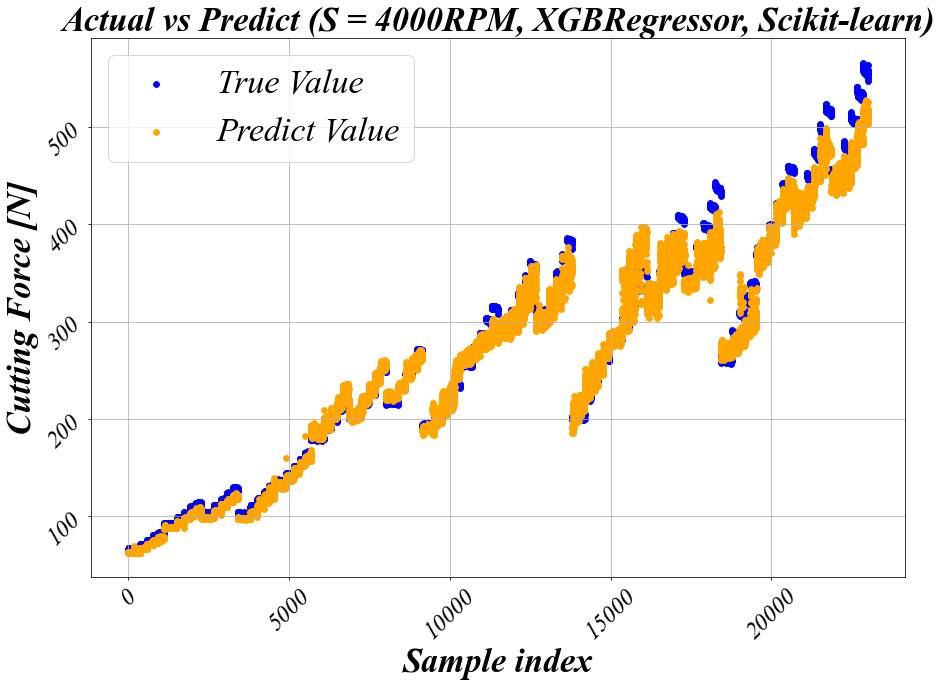

In [32]:
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig = plt.figure(figsize=(15,10),dpi=70)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'italic'
plt.title('Actual vs Predict (S = 4000RPM, XGBRegressor, Scikit-learn)',**tfont)
plt.scatter(range(0, len(y_test)), y_test, label='True Value', color = 'blue')
#plt.ylim((0,300))
plt.scatter(range(0, len(XGB_test_pred)), XGB_test_pred, label='Predict Value', color = 'orange')
plt.xlabel(r'Sample index',**lfont)
plt.ylabel(r'Cutting Force [N]',**lfont)
plt.tick_params(labelrotation=45, labelsize=25)
plt.grid()
plt.legend(fontsize = 35)
plt.show()
#fig.savefig("Bi-directional LSTM Prediction.svg")

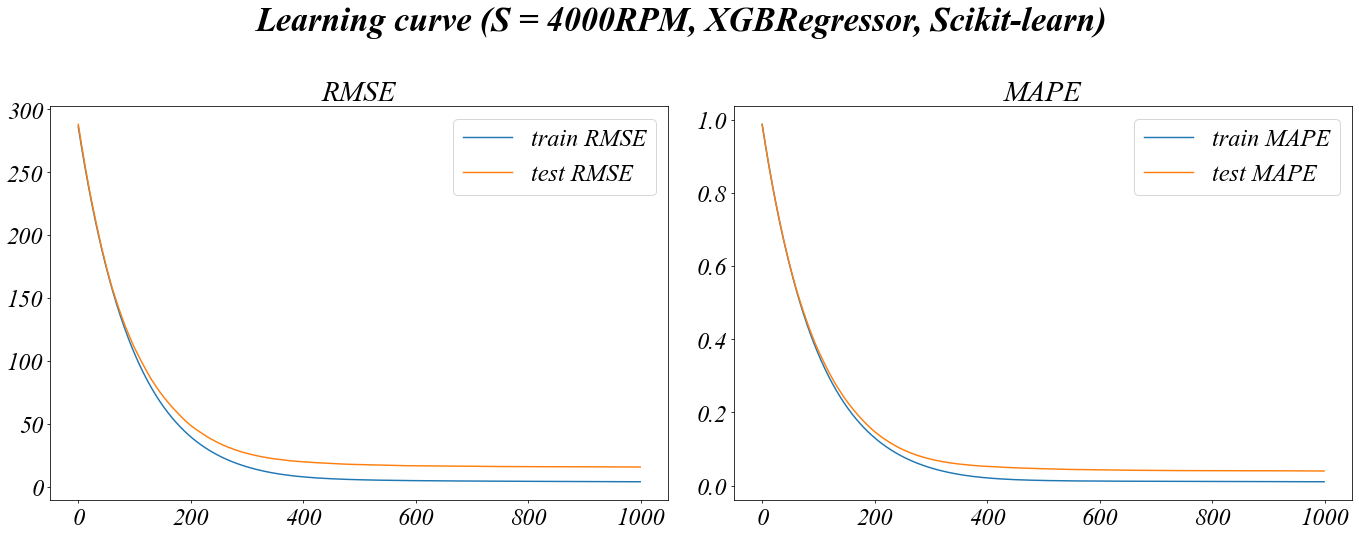

In [33]:
results = xgb.evals_result() # 학습 결과 가져오기


train_rmse = results['validation_0']['rmse']
test_rmse = results['validation_1']['rmse']

train_mape = results['validation_0']['mape']
test_mape = results['validation_1']['mape']

#학습곡선 그리기
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8),dpi=70)

ax[0].set_title("RMSE")
ax[1].set_title("MAPE")

ax[0].plot(train_rmse, label='train RMSE')
ax[0].plot(test_rmse, label='test RMSE')
ax[0].legend()

ax[1].plot(train_mape, label='train MAPE')
ax[1].plot(test_mape, label='test MAPE')
ax[1].legend()

fig.suptitle('Learning curve (S = 4000RPM, XGBRegressor, Scikit-learn)',**tfont)
fig.tight_layout() # 사용하면 플롯간 여백을 조정해준다. 
plt.show()
fig.savefig("./plot/Learning curve rpm 4000_cycle.png")

# ***RPM 4500 test***

In [34]:
train = pd.concat([rpm_3000, rpm_3500, rpm_4000, rpm_5000], axis  = 0)
train = train.reset_index(drop=True)
X_train = train.iloc[: , 1:]
y_train = train['RMS_CF_max']

In [35]:
X_test = rpm_4500.iloc[: , 1:]
y_test = rpm_4500['RMS_CF_max']

In [36]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
#X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [37]:
xgb = XGBRegressor(learning_rate = 0.01,
                   n_estimators = 1000,
                   n_jobs  = -1,random_state=42)

eval_set = [(X_train_scaled, y_train), (X_test_scaled, y_test)] # 학습에 사용한 데이터셋과 검증에 사용한 데이터셋

xgb.fit(X_train_scaled, y_train,eval_set=eval_set, eval_metric=['rmse', 'mape'])

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


[0]	validation_0-rmse:290.32507	validation_0-mape:0.98748	validation_1-rmse:272.49846	validation_1-mape:0.98599
[1]	validation_0-rmse:287.43759	validation_0-mape:0.97756	validation_1-rmse:269.34819	validation_1-mape:0.97477
[2]	validation_0-rmse:284.57909	validation_0-mape:0.96775	validation_1-rmse:266.22202	validation_1-mape:0.96365
[3]	validation_0-rmse:281.74921	validation_0-mape:0.95803	validation_1-rmse:263.12863	validation_1-mape:0.95265
[4]	validation_0-rmse:278.94794	validation_0-mape:0.94841	validation_1-rmse:260.02107	validation_1-mape:0.94157
[5]	validation_0-rmse:276.17470	validation_0-mape:0.93888	validation_1-rmse:257.05546	validation_1-mape:0.93108
[6]	validation_0-rmse:273.42913	validation_0-mape:0.92945	validation_1-rmse:254.03176	validation_1-mape:0.92028
[7]	validation_0-rmse:270.71100	validation_0-mape:0.92012	validation_1-rmse:251.02056	validation_1-mape:0.90955
[8]	validation_0-rmse:268.02041	validation_0-mape:0.91088	validation_1-rmse:248.05505	validation_1-mape:

[73]	validation_0-rmse:140.14899	validation_0-mape:0.47235	validation_1-rmse:109.00889	validation_1-mape:0.40252
[74]	validation_0-rmse:138.75993	validation_0-mape:0.46761	validation_1-rmse:107.49450	validation_1-mape:0.39727
[75]	validation_0-rmse:137.38523	validation_0-mape:0.46291	validation_1-rmse:106.01519	validation_1-mape:0.39209
[76]	validation_0-rmse:136.02606	validation_0-mape:0.45824	validation_1-rmse:104.54559	validation_1-mape:0.38664
[77]	validation_0-rmse:134.67831	validation_0-mape:0.45364	validation_1-rmse:103.09695	validation_1-mape:0.38148
[78]	validation_0-rmse:133.34639	validation_0-mape:0.44907	validation_1-rmse:101.66502	validation_1-mape:0.37618
[79]	validation_0-rmse:132.02552	validation_0-mape:0.44456	validation_1-rmse:100.21814	validation_1-mape:0.37116
[80]	validation_0-rmse:130.71798	validation_0-mape:0.44009	validation_1-rmse:98.81537	validation_1-mape:0.36624
[81]	validation_0-rmse:129.42534	validation_0-mape:0.43565	validation_1-rmse:97.42684	validation_

[147]	validation_0-rmse:67.30437	validation_0-mape:0.22337	validation_1-rmse:34.75690	validation_1-mape:0.13005
[148]	validation_0-rmse:66.64330	validation_0-mape:0.22112	validation_1-rmse:34.21780	validation_1-mape:0.12811
[149]	validation_0-rmse:65.98937	validation_0-mape:0.21889	validation_1-rmse:33.70680	validation_1-mape:0.12629
[150]	validation_0-rmse:65.34329	validation_0-mape:0.21669	validation_1-rmse:33.16139	validation_1-mape:0.12431
[151]	validation_0-rmse:64.70476	validation_0-mape:0.21450	validation_1-rmse:32.67361	validation_1-mape:0.12254
[152]	validation_0-rmse:64.06963	validation_0-mape:0.21234	validation_1-rmse:32.19870	validation_1-mape:0.12080
[153]	validation_0-rmse:63.44265	validation_0-mape:0.21020	validation_1-rmse:31.70135	validation_1-mape:0.11896
[154]	validation_0-rmse:62.82082	validation_0-mape:0.20808	validation_1-rmse:31.25130	validation_1-mape:0.11730
[155]	validation_0-rmse:62.20706	validation_0-mape:0.20598	validation_1-rmse:30.82438	validation_1-mape:

[221]	validation_0-rmse:32.74511	validation_0-mape:0.10563	validation_1-rmse:27.04403	validation_1-mape:0.07269
[222]	validation_0-rmse:32.43416	validation_0-mape:0.10457	validation_1-rmse:27.19175	validation_1-mape:0.07280
[223]	validation_0-rmse:32.12704	validation_0-mape:0.10351	validation_1-rmse:27.35280	validation_1-mape:0.07291
[224]	validation_0-rmse:31.82149	validation_0-mape:0.10247	validation_1-rmse:27.52424	validation_1-mape:0.07304
[225]	validation_0-rmse:31.51900	validation_0-mape:0.10144	validation_1-rmse:27.69622	validation_1-mape:0.07318
[226]	validation_0-rmse:31.21986	validation_0-mape:0.10042	validation_1-rmse:27.88015	validation_1-mape:0.07333
[227]	validation_0-rmse:30.92373	validation_0-mape:0.09941	validation_1-rmse:28.06416	validation_1-mape:0.07350
[228]	validation_0-rmse:30.63081	validation_0-mape:0.09841	validation_1-rmse:28.23897	validation_1-mape:0.07365
[229]	validation_0-rmse:30.34078	validation_0-mape:0.09742	validation_1-rmse:28.40363	validation_1-mape:

[295]	validation_0-rmse:16.59956	validation_0-mape:0.05036	validation_1-rmse:38.52742	validation_1-mape:0.08981
[296]	validation_0-rmse:16.45652	validation_0-mape:0.04987	validation_1-rmse:38.65367	validation_1-mape:0.09007
[297]	validation_0-rmse:16.31550	validation_0-mape:0.04938	validation_1-rmse:38.76803	validation_1-mape:0.09031
[298]	validation_0-rmse:16.17590	validation_0-mape:0.04890	validation_1-rmse:38.89216	validation_1-mape:0.09056
[299]	validation_0-rmse:16.03849	validation_0-mape:0.04842	validation_1-rmse:38.98340	validation_1-mape:0.09078
[300]	validation_0-rmse:15.90171	validation_0-mape:0.04795	validation_1-rmse:39.10770	validation_1-mape:0.09105
[301]	validation_0-rmse:15.76681	validation_0-mape:0.04749	validation_1-rmse:39.22968	validation_1-mape:0.09131
[302]	validation_0-rmse:15.63311	validation_0-mape:0.04702	validation_1-rmse:39.35903	validation_1-mape:0.09160
[303]	validation_0-rmse:15.50098	validation_0-mape:0.04657	validation_1-rmse:39.46813	validation_1-mape:

[369]	validation_0-rmse:9.34470	validation_0-mape:0.02554	validation_1-rmse:44.29289	validation_1-mape:0.10454
[370]	validation_0-rmse:9.28356	validation_0-mape:0.02533	validation_1-rmse:44.34755	validation_1-mape:0.10471
[371]	validation_0-rmse:9.22327	validation_0-mape:0.02513	validation_1-rmse:44.40663	validation_1-mape:0.10489
[372]	validation_0-rmse:9.16308	validation_0-mape:0.02493	validation_1-rmse:44.46253	validation_1-mape:0.10504
[373]	validation_0-rmse:9.10489	validation_0-mape:0.02473	validation_1-rmse:44.51677	validation_1-mape:0.10521
[374]	validation_0-rmse:9.04720	validation_0-mape:0.02454	validation_1-rmse:44.57802	validation_1-mape:0.10539
[375]	validation_0-rmse:8.98967	validation_0-mape:0.02434	validation_1-rmse:44.63638	validation_1-mape:0.10557
[376]	validation_0-rmse:8.93338	validation_0-mape:0.02415	validation_1-rmse:44.68202	validation_1-mape:0.10572
[377]	validation_0-rmse:8.87689	validation_0-mape:0.02397	validation_1-rmse:44.73087	validation_1-mape:0.10587
[

[443]	validation_0-rmse:6.43633	validation_0-mape:0.01599	validation_1-rmse:46.89208	validation_1-mape:0.11287
[444]	validation_0-rmse:6.41313	validation_0-mape:0.01592	validation_1-rmse:46.91743	validation_1-mape:0.11296
[445]	validation_0-rmse:6.39093	validation_0-mape:0.01584	validation_1-rmse:46.92158	validation_1-mape:0.11296
[446]	validation_0-rmse:6.36874	validation_0-mape:0.01578	validation_1-rmse:46.94740	validation_1-mape:0.11304
[447]	validation_0-rmse:6.34666	validation_0-mape:0.01571	validation_1-rmse:46.96894	validation_1-mape:0.11312
[448]	validation_0-rmse:6.32526	validation_0-mape:0.01564	validation_1-rmse:46.98947	validation_1-mape:0.11318
[449]	validation_0-rmse:6.30397	validation_0-mape:0.01558	validation_1-rmse:47.01229	validation_1-mape:0.11326
[450]	validation_0-rmse:6.28320	validation_0-mape:0.01551	validation_1-rmse:47.01312	validation_1-mape:0.11326
[451]	validation_0-rmse:6.26268	validation_0-mape:0.01545	validation_1-rmse:47.05318	validation_1-mape:0.11337
[

[517]	validation_0-rmse:5.35453	validation_0-mape:0.01285	validation_1-rmse:47.83766	validation_1-mape:0.11601
[518]	validation_0-rmse:5.34508	validation_0-mape:0.01283	validation_1-rmse:47.83967	validation_1-mape:0.11604
[519]	validation_0-rmse:5.33668	validation_0-mape:0.01281	validation_1-rmse:47.84536	validation_1-mape:0.11607
[520]	validation_0-rmse:5.32767	validation_0-mape:0.01278	validation_1-rmse:47.83180	validation_1-mape:0.11607
[521]	validation_0-rmse:5.31873	validation_0-mape:0.01276	validation_1-rmse:47.85293	validation_1-mape:0.11614
[522]	validation_0-rmse:5.31065	validation_0-mape:0.01274	validation_1-rmse:47.86728	validation_1-mape:0.11617
[523]	validation_0-rmse:5.30238	validation_0-mape:0.01272	validation_1-rmse:47.83176	validation_1-mape:0.11616
[524]	validation_0-rmse:5.29379	validation_0-mape:0.01270	validation_1-rmse:47.85235	validation_1-mape:0.11623
[525]	validation_0-rmse:5.28568	validation_0-mape:0.01268	validation_1-rmse:47.85433	validation_1-mape:0.11621
[

[591]	validation_0-rmse:4.89138	validation_0-mape:0.01183	validation_1-rmse:47.51158	validation_1-mape:0.11649
[592]	validation_0-rmse:4.88611	validation_0-mape:0.01182	validation_1-rmse:47.48270	validation_1-mape:0.11646
[593]	validation_0-rmse:4.88160	validation_0-mape:0.01181	validation_1-rmse:47.47750	validation_1-mape:0.11644
[594]	validation_0-rmse:4.87722	validation_0-mape:0.01180	validation_1-rmse:47.47597	validation_1-mape:0.11643
[595]	validation_0-rmse:4.87281	validation_0-mape:0.01180	validation_1-rmse:47.45296	validation_1-mape:0.11640
[596]	validation_0-rmse:4.86855	validation_0-mape:0.01179	validation_1-rmse:47.44543	validation_1-mape:0.11639
[597]	validation_0-rmse:4.86495	validation_0-mape:0.01178	validation_1-rmse:47.43707	validation_1-mape:0.11639
[598]	validation_0-rmse:4.86066	validation_0-mape:0.01178	validation_1-rmse:47.41042	validation_1-mape:0.11637
[599]	validation_0-rmse:4.85708	validation_0-mape:0.01177	validation_1-rmse:47.40524	validation_1-mape:0.11637
[

[665]	validation_0-rmse:4.63939	validation_0-mape:0.01138	validation_1-rmse:46.91664	validation_1-mape:0.11591
[666]	validation_0-rmse:4.63651	validation_0-mape:0.01137	validation_1-rmse:46.89988	validation_1-mape:0.11588
[667]	validation_0-rmse:4.63338	validation_0-mape:0.01137	validation_1-rmse:46.87371	validation_1-mape:0.11583
[668]	validation_0-rmse:4.63103	validation_0-mape:0.01136	validation_1-rmse:46.88624	validation_1-mape:0.11586
[669]	validation_0-rmse:4.62799	validation_0-mape:0.01136	validation_1-rmse:46.86678	validation_1-mape:0.11584
[670]	validation_0-rmse:4.62428	validation_0-mape:0.01135	validation_1-rmse:46.85287	validation_1-mape:0.11580
[671]	validation_0-rmse:4.62129	validation_0-mape:0.01135	validation_1-rmse:46.84084	validation_1-mape:0.11580
[672]	validation_0-rmse:4.61903	validation_0-mape:0.01134	validation_1-rmse:46.84359	validation_1-mape:0.11580
[673]	validation_0-rmse:4.61668	validation_0-mape:0.01134	validation_1-rmse:46.82787	validation_1-mape:0.11579
[

[739]	validation_0-rmse:4.46281	validation_0-mape:0.01103	validation_1-rmse:46.52150	validation_1-mape:0.11496
[740]	validation_0-rmse:4.46103	validation_0-mape:0.01103	validation_1-rmse:46.50952	validation_1-mape:0.11494
[741]	validation_0-rmse:4.45887	validation_0-mape:0.01102	validation_1-rmse:46.49134	validation_1-mape:0.11492
[742]	validation_0-rmse:4.45668	validation_0-mape:0.01102	validation_1-rmse:46.47759	validation_1-mape:0.11490
[743]	validation_0-rmse:4.45478	validation_0-mape:0.01101	validation_1-rmse:46.47354	validation_1-mape:0.11488
[744]	validation_0-rmse:4.45283	validation_0-mape:0.01101	validation_1-rmse:46.47314	validation_1-mape:0.11488
[745]	validation_0-rmse:4.45103	validation_0-mape:0.01101	validation_1-rmse:46.47374	validation_1-mape:0.11488
[746]	validation_0-rmse:4.44895	validation_0-mape:0.01100	validation_1-rmse:46.47002	validation_1-mape:0.11486
[747]	validation_0-rmse:4.44715	validation_0-mape:0.01100	validation_1-rmse:46.45719	validation_1-mape:0.11484
[

[813]	validation_0-rmse:4.31609	validation_0-mape:0.01074	validation_1-rmse:46.00985	validation_1-mape:0.11406
[814]	validation_0-rmse:4.31283	validation_0-mape:0.01073	validation_1-rmse:45.97289	validation_1-mape:0.11400
[815]	validation_0-rmse:4.31126	validation_0-mape:0.01073	validation_1-rmse:45.97204	validation_1-mape:0.11400
[816]	validation_0-rmse:4.30929	validation_0-mape:0.01072	validation_1-rmse:45.97051	validation_1-mape:0.11400
[817]	validation_0-rmse:4.30817	validation_0-mape:0.01072	validation_1-rmse:45.96936	validation_1-mape:0.11399
[818]	validation_0-rmse:4.30588	validation_0-mape:0.01072	validation_1-rmse:45.95444	validation_1-mape:0.11397
[819]	validation_0-rmse:4.30388	validation_0-mape:0.01071	validation_1-rmse:45.95167	validation_1-mape:0.11395
[820]	validation_0-rmse:4.30180	validation_0-mape:0.01071	validation_1-rmse:45.95464	validation_1-mape:0.11395
[821]	validation_0-rmse:4.29863	validation_0-mape:0.01070	validation_1-rmse:45.92811	validation_1-mape:0.11389
[

[887]	validation_0-rmse:4.18097	validation_0-mape:0.01047	validation_1-rmse:45.58425	validation_1-mape:0.11309
[888]	validation_0-rmse:4.17947	validation_0-mape:0.01047	validation_1-rmse:45.57474	validation_1-mape:0.11307
[889]	validation_0-rmse:4.17768	validation_0-mape:0.01046	validation_1-rmse:45.57337	validation_1-mape:0.11306
[890]	validation_0-rmse:4.17527	validation_0-mape:0.01046	validation_1-rmse:45.56174	validation_1-mape:0.11304
[891]	validation_0-rmse:4.17399	validation_0-mape:0.01046	validation_1-rmse:45.55723	validation_1-mape:0.11301
[892]	validation_0-rmse:4.17245	validation_0-mape:0.01046	validation_1-rmse:45.55104	validation_1-mape:0.11299
[893]	validation_0-rmse:4.16987	validation_0-mape:0.01045	validation_1-rmse:45.54826	validation_1-mape:0.11298
[894]	validation_0-rmse:4.16822	validation_0-mape:0.01045	validation_1-rmse:45.52999	validation_1-mape:0.11295
[895]	validation_0-rmse:4.16643	validation_0-mape:0.01044	validation_1-rmse:45.51721	validation_1-mape:0.11294
[

[961]	validation_0-rmse:4.05367	validation_0-mape:0.01023	validation_1-rmse:45.11671	validation_1-mape:0.11186
[962]	validation_0-rmse:4.05155	validation_0-mape:0.01023	validation_1-rmse:45.10049	validation_1-mape:0.11183
[963]	validation_0-rmse:4.04931	validation_0-mape:0.01022	validation_1-rmse:45.09245	validation_1-mape:0.11179
[964]	validation_0-rmse:4.04774	validation_0-mape:0.01022	validation_1-rmse:45.08134	validation_1-mape:0.11177
[965]	validation_0-rmse:4.04647	validation_0-mape:0.01022	validation_1-rmse:45.08837	validation_1-mape:0.11178
[966]	validation_0-rmse:4.04530	validation_0-mape:0.01022	validation_1-rmse:45.08636	validation_1-mape:0.11177
[967]	validation_0-rmse:4.04347	validation_0-mape:0.01021	validation_1-rmse:45.08120	validation_1-mape:0.11175
[968]	validation_0-rmse:4.04179	validation_0-mape:0.01021	validation_1-rmse:45.07152	validation_1-mape:0.11169
[969]	validation_0-rmse:4.03980	validation_0-mape:0.01021	validation_1-rmse:45.06363	validation_1-mape:0.11167
[

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [38]:
XGB_train_pred = xgb.predict(X_train_scaled)
XGB_test_pred = xgb.predict(X_test_scaled)

print('Train RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_train, XGB_train_pred))))
print('Train MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_train, XGB_train_pred)))

print('Test RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_test, XGB_test_pred))))
print('Test MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_test, XGB_test_pred)))

Train RMSE: 3.9904
Train MAPE: 1.0115
Test RMSE: 44.8554
Test MAPE: 11.1248


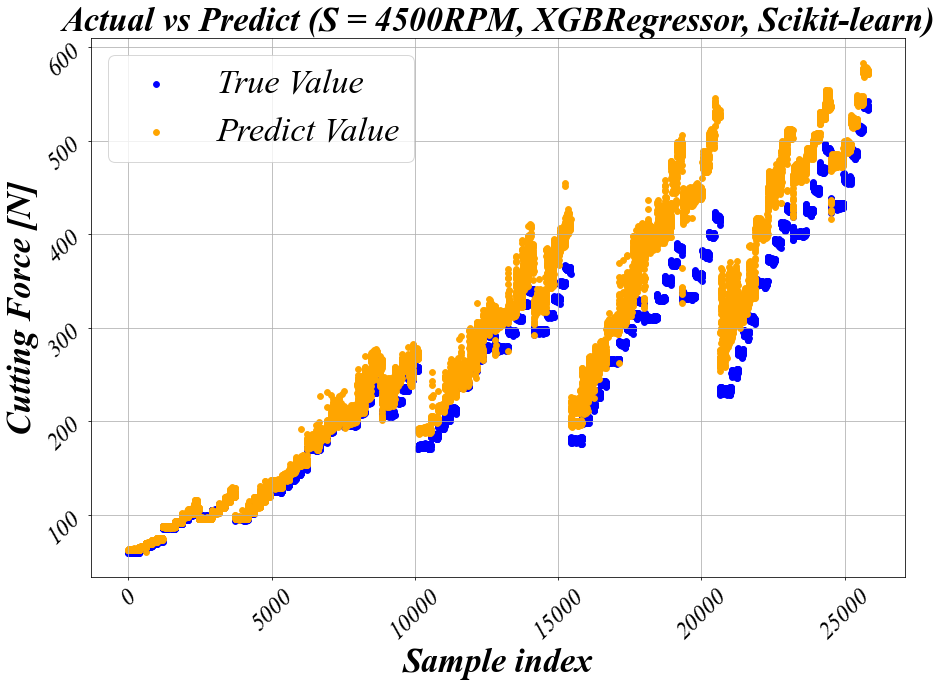

In [39]:
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig = plt.figure(figsize=(15,10),dpi=70)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'italic'
plt.title('Actual vs Predict (S = 4500RPM, XGBRegressor, Scikit-learn)',**tfont)
plt.scatter(range(0, len(y_test)), y_test, label='True Value', color = 'blue')
#plt.ylim((0,300))
plt.scatter(range(0, len(XGB_test_pred)), XGB_test_pred, label='Predict Value', color = 'orange')
plt.xlabel(r'Sample index',**lfont)
plt.ylabel(r'Cutting Force [N]',**lfont)
plt.tick_params(labelrotation=45, labelsize=25)
plt.grid()
plt.legend(fontsize = 35)
plt.show()
#fig.savefig("Bi-directional LSTM Prediction.svg")

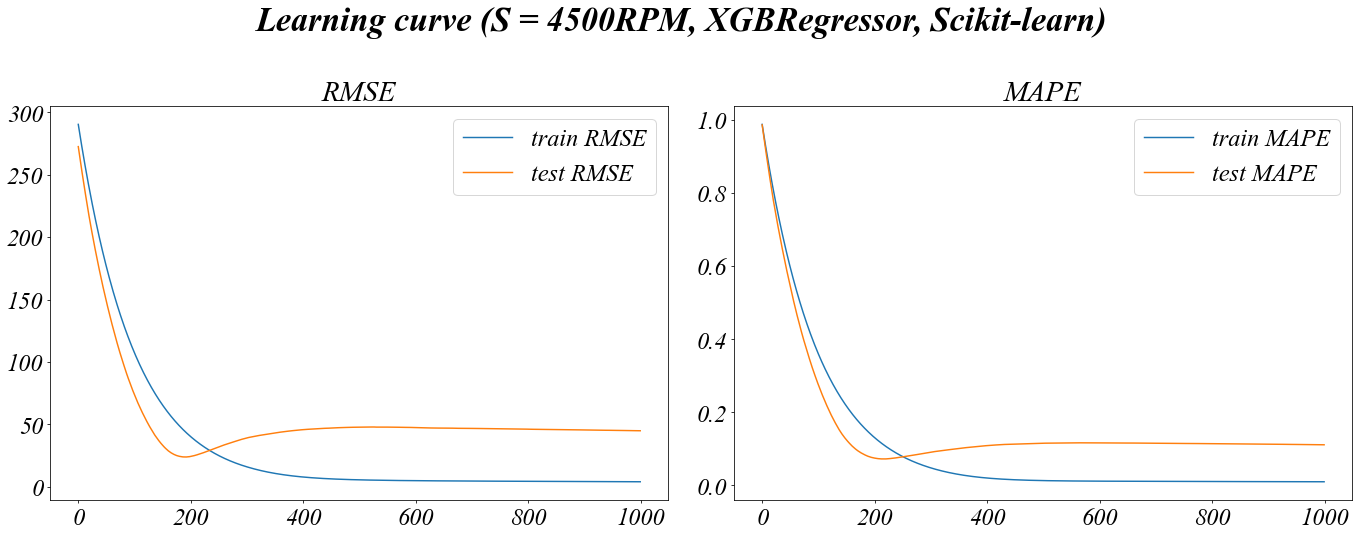

In [40]:
results = xgb.evals_result() # 학습 결과 가져오기


train_rmse = results['validation_0']['rmse']
test_rmse = results['validation_1']['rmse']

train_mape = results['validation_0']['mape']
test_mape = results['validation_1']['mape']

#학습곡선 그리기
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8),dpi=70)

ax[0].set_title("RMSE")
ax[1].set_title("MAPE")

ax[0].plot(train_rmse, label='train RMSE')
ax[0].plot(test_rmse, label='test RMSE')
ax[0].legend()

ax[1].plot(train_mape, label='train MAPE')
ax[1].plot(test_mape, label='test MAPE')
ax[1].legend()

fig.suptitle('Learning curve (S = 4500RPM, XGBRegressor, Scikit-learn)',**tfont)
fig.tight_layout() # 사용하면 플롯간 여백을 조정해준다. 
plt.show()
fig.savefig("./plot/Learning curve rpm 4500_cycle.png")

# ***RPM 5000 test***

In [41]:
train = pd.concat([rpm_3000, rpm_3500, rpm_4000, rpm_4500], axis  = 0)
train = train.reset_index(drop=True)
X_train = train.iloc[: , 1:]
y_train = train['RMS_CF_max']

In [42]:
X_test = rpm_5000.iloc[: , 1:]
y_test = rpm_5000['RMS_CF_max']

In [43]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
#X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [44]:
xgb = XGBRegressor(learning_rate = 0.01,
                   n_estimators = 1000,
                   n_jobs  = -1,random_state=42)

eval_set = [(X_train_scaled, y_train), (X_test_scaled, y_test)] # 학습에 사용한 데이터셋과 검증에 사용한 데이터셋

xgb.fit(X_train_scaled, y_train,eval_set=eval_set, eval_metric=['rmse', 'mape'])

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


[0]	validation_0-rmse:291.57327	validation_0-mape:0.98750	validation_1-rmse:271.11526	validation_1-mape:0.98837
[1]	validation_0-rmse:288.67329	validation_0-mape:0.97758	validation_1-rmse:269.07895	validation_1-mape:0.97950
[2]	validation_0-rmse:285.80176	validation_0-mape:0.96777	validation_1-rmse:267.05958	validation_1-mape:0.97071
[3]	validation_0-rmse:282.96067	validation_0-mape:0.95805	validation_1-rmse:265.06648	validation_1-mape:0.96199
[4]	validation_0-rmse:280.14640	validation_0-mape:0.94843	validation_1-rmse:263.06112	validation_1-mape:0.95329
[5]	validation_0-rmse:277.36139	validation_0-mape:0.93890	validation_1-rmse:261.11074	validation_1-mape:0.94477
[6]	validation_0-rmse:274.60448	validation_0-mape:0.92947	validation_1-rmse:259.17951	validation_1-mape:0.93629
[7]	validation_0-rmse:271.87385	validation_0-mape:0.92014	validation_1-rmse:257.23825	validation_1-mape:0.92787
[8]	validation_0-rmse:269.17223	validation_0-mape:0.91090	validation_1-rmse:255.34846	validation_1-mape:

[73]	validation_0-rmse:140.79364	validation_0-mape:0.47256	validation_1-rmse:168.68504	validation_1-mape:0.53567
[74]	validation_0-rmse:139.40096	validation_0-mape:0.46781	validation_1-rmse:167.77501	validation_1-mape:0.53159
[75]	validation_0-rmse:138.02286	validation_0-mape:0.46311	validation_1-rmse:166.86000	validation_1-mape:0.52741
[76]	validation_0-rmse:136.65751	validation_0-mape:0.45845	validation_1-rmse:165.97743	validation_1-mape:0.52349
[77]	validation_0-rmse:135.30505	validation_0-mape:0.45385	validation_1-rmse:165.10363	validation_1-mape:0.51949
[78]	validation_0-rmse:133.96672	validation_0-mape:0.44929	validation_1-rmse:164.25274	validation_1-mape:0.51565
[79]	validation_0-rmse:132.64135	validation_0-mape:0.44477	validation_1-rmse:163.40356	validation_1-mape:0.51179
[80]	validation_0-rmse:131.33083	validation_0-mape:0.44030	validation_1-rmse:162.54737	validation_1-mape:0.50784
[81]	validation_0-rmse:130.03183	validation_0-mape:0.43588	validation_1-rmse:161.71217	validatio

[146]	validation_0-rmse:68.39823	validation_0-mape:0.22586	validation_1-rmse:121.72316	validation_1-mape:0.32342
[147]	validation_0-rmse:67.72976	validation_0-mape:0.22358	validation_1-rmse:121.18383	validation_1-mape:0.32131
[148]	validation_0-rmse:67.06889	validation_0-mape:0.22133	validation_1-rmse:120.80076	validation_1-mape:0.31952
[149]	validation_0-rmse:66.41420	validation_0-mape:0.21910	validation_1-rmse:120.40538	validation_1-mape:0.31763
[150]	validation_0-rmse:65.76562	validation_0-mape:0.21689	validation_1-rmse:119.92269	validation_1-mape:0.31569
[151]	validation_0-rmse:65.12454	validation_0-mape:0.21470	validation_1-rmse:119.40277	validation_1-mape:0.31366
[152]	validation_0-rmse:64.48917	validation_0-mape:0.21254	validation_1-rmse:119.01135	validation_1-mape:0.31182
[153]	validation_0-rmse:63.86005	validation_0-mape:0.21040	validation_1-rmse:118.54653	validation_1-mape:0.30996
[154]	validation_0-rmse:63.23738	validation_0-mape:0.20828	validation_1-rmse:118.16699	validatio

[219]	validation_0-rmse:33.83853	validation_0-mape:0.10776	validation_1-rmse:98.09654	validation_1-mape:0.22181
[220]	validation_0-rmse:33.52293	validation_0-mape:0.10667	validation_1-rmse:97.93669	validation_1-mape:0.22097
[221]	validation_0-rmse:33.20878	validation_0-mape:0.10560	validation_1-rmse:97.70753	validation_1-mape:0.22003
[222]	validation_0-rmse:32.89957	validation_0-mape:0.10453	validation_1-rmse:97.50146	validation_1-mape:0.21914
[223]	validation_0-rmse:32.59201	validation_0-mape:0.10348	validation_1-rmse:97.29592	validation_1-mape:0.21824
[224]	validation_0-rmse:32.28913	validation_0-mape:0.10244	validation_1-rmse:97.11595	validation_1-mape:0.21738
[225]	validation_0-rmse:31.98889	validation_0-mape:0.10141	validation_1-rmse:96.93800	validation_1-mape:0.21652
[226]	validation_0-rmse:31.69221	validation_0-mape:0.10039	validation_1-rmse:96.75379	validation_1-mape:0.21569
[227]	validation_0-rmse:31.39908	validation_0-mape:0.09938	validation_1-rmse:96.57962	validation_1-mape:

[293]	validation_0-rmse:17.30380	validation_0-mape:0.05155	validation_1-rmse:82.38566	validation_1-mape:0.16858
[294]	validation_0-rmse:17.15813	validation_0-mape:0.05105	validation_1-rmse:82.24276	validation_1-mape:0.16814
[295]	validation_0-rmse:17.01336	validation_0-mape:0.05056	validation_1-rmse:82.05639	validation_1-mape:0.16765
[296]	validation_0-rmse:16.86984	validation_0-mape:0.05008	validation_1-rmse:81.86188	validation_1-mape:0.16713
[297]	validation_0-rmse:16.72783	validation_0-mape:0.04960	validation_1-rmse:81.66077	validation_1-mape:0.16659
[298]	validation_0-rmse:16.58785	validation_0-mape:0.04912	validation_1-rmse:81.47818	validation_1-mape:0.16613
[299]	validation_0-rmse:16.45124	validation_0-mape:0.04865	validation_1-rmse:81.37858	validation_1-mape:0.16580
[300]	validation_0-rmse:16.31496	validation_0-mape:0.04819	validation_1-rmse:81.24502	validation_1-mape:0.16539
[301]	validation_0-rmse:16.17934	validation_0-mape:0.04773	validation_1-rmse:81.05757	validation_1-mape:

[367]	validation_0-rmse:10.00879	validation_0-mape:0.02696	validation_1-rmse:73.79726	validation_1-mape:0.14618
[368]	validation_0-rmse:9.94793	validation_0-mape:0.02676	validation_1-rmse:73.72471	validation_1-mape:0.14601
[369]	validation_0-rmse:9.88889	validation_0-mape:0.02657	validation_1-rmse:73.69013	validation_1-mape:0.14591
[370]	validation_0-rmse:9.83046	validation_0-mape:0.02638	validation_1-rmse:73.64409	validation_1-mape:0.14579
[371]	validation_0-rmse:9.77196	validation_0-mape:0.02619	validation_1-rmse:73.57661	validation_1-mape:0.14562
[372]	validation_0-rmse:9.71473	validation_0-mape:0.02600	validation_1-rmse:73.53145	validation_1-mape:0.14549
[373]	validation_0-rmse:9.65748	validation_0-mape:0.02581	validation_1-rmse:73.43411	validation_1-mape:0.14525
[374]	validation_0-rmse:9.60225	validation_0-mape:0.02563	validation_1-rmse:73.39140	validation_1-mape:0.14514
[375]	validation_0-rmse:9.54657	validation_0-mape:0.02546	validation_1-rmse:73.31556	validation_1-mape:0.14495


[441]	validation_0-rmse:7.10572	validation_0-mape:0.01794	validation_1-rmse:69.96117	validation_1-mape:0.13657
[442]	validation_0-rmse:7.08210	validation_0-mape:0.01788	validation_1-rmse:69.88131	validation_1-mape:0.13641
[443]	validation_0-rmse:7.06007	validation_0-mape:0.01782	validation_1-rmse:69.85149	validation_1-mape:0.13632
[444]	validation_0-rmse:7.03704	validation_0-mape:0.01775	validation_1-rmse:69.80422	validation_1-mape:0.13616
[445]	validation_0-rmse:7.01543	validation_0-mape:0.01769	validation_1-rmse:69.78515	validation_1-mape:0.13612
[446]	validation_0-rmse:6.99307	validation_0-mape:0.01763	validation_1-rmse:69.72869	validation_1-mape:0.13593
[447]	validation_0-rmse:6.97187	validation_0-mape:0.01756	validation_1-rmse:69.69697	validation_1-mape:0.13585
[448]	validation_0-rmse:6.95111	validation_0-mape:0.01750	validation_1-rmse:69.67847	validation_1-mape:0.13580
[449]	validation_0-rmse:6.93056	validation_0-mape:0.01745	validation_1-rmse:69.64719	validation_1-mape:0.13571
[

[515]	validation_0-rmse:5.98884	validation_0-mape:0.01495	validation_1-rmse:67.08031	validation_1-mape:0.12941
[516]	validation_0-rmse:5.97997	validation_0-mape:0.01493	validation_1-rmse:67.06595	validation_1-mape:0.12938
[517]	validation_0-rmse:5.97100	validation_0-mape:0.01490	validation_1-rmse:67.03264	validation_1-mape:0.12931
[518]	validation_0-rmse:5.96130	validation_0-mape:0.01488	validation_1-rmse:66.92247	validation_1-mape:0.12907
[519]	validation_0-rmse:5.95125	validation_0-mape:0.01486	validation_1-rmse:66.88465	validation_1-mape:0.12899
[520]	validation_0-rmse:5.94143	validation_0-mape:0.01484	validation_1-rmse:66.84726	validation_1-mape:0.12890
[521]	validation_0-rmse:5.93322	validation_0-mape:0.01482	validation_1-rmse:66.78258	validation_1-mape:0.12882
[522]	validation_0-rmse:5.92505	validation_0-mape:0.01480	validation_1-rmse:66.76115	validation_1-mape:0.12877
[523]	validation_0-rmse:5.91553	validation_0-mape:0.01478	validation_1-rmse:66.72442	validation_1-mape:0.12869
[

[589]	validation_0-rmse:5.45858	validation_0-mape:0.01382	validation_1-rmse:64.08880	validation_1-mape:0.12335
[590]	validation_0-rmse:5.45316	validation_0-mape:0.01381	validation_1-rmse:64.06763	validation_1-mape:0.12331
[591]	validation_0-rmse:5.44863	validation_0-mape:0.01380	validation_1-rmse:64.03748	validation_1-mape:0.12327
[592]	validation_0-rmse:5.44368	validation_0-mape:0.01379	validation_1-rmse:64.03209	validation_1-mape:0.12325
[593]	validation_0-rmse:5.43871	validation_0-mape:0.01378	validation_1-rmse:64.02753	validation_1-mape:0.12324
[594]	validation_0-rmse:5.43384	validation_0-mape:0.01377	validation_1-rmse:64.02213	validation_1-mape:0.12322
[595]	validation_0-rmse:5.42874	validation_0-mape:0.01376	validation_1-rmse:63.94146	validation_1-mape:0.12300
[596]	validation_0-rmse:5.42397	validation_0-mape:0.01375	validation_1-rmse:63.93624	validation_1-mape:0.12298
[597]	validation_0-rmse:5.41927	validation_0-mape:0.01374	validation_1-rmse:63.93087	validation_1-mape:0.12297
[

[663]	validation_0-rmse:5.14335	validation_0-mape:0.01318	validation_1-rmse:61.48716	validation_1-mape:0.11783
[664]	validation_0-rmse:5.14018	validation_0-mape:0.01317	validation_1-rmse:61.48336	validation_1-mape:0.11782
[665]	validation_0-rmse:5.13651	validation_0-mape:0.01316	validation_1-rmse:61.48072	validation_1-mape:0.11781
[666]	validation_0-rmse:5.13328	validation_0-mape:0.01316	validation_1-rmse:61.47370	validation_1-mape:0.11780
[667]	validation_0-rmse:5.13050	validation_0-mape:0.01315	validation_1-rmse:61.46659	validation_1-mape:0.11778
[668]	validation_0-rmse:5.12717	validation_0-mape:0.01314	validation_1-rmse:61.44868	validation_1-mape:0.11773
[669]	validation_0-rmse:5.12391	validation_0-mape:0.01314	validation_1-rmse:61.38832	validation_1-mape:0.11764
[670]	validation_0-rmse:5.12073	validation_0-mape:0.01313	validation_1-rmse:61.38393	validation_1-mape:0.11763
[671]	validation_0-rmse:5.11776	validation_0-mape:0.01312	validation_1-rmse:61.35517	validation_1-mape:0.11755
[

[737]	validation_0-rmse:4.92503	validation_0-mape:0.01272	validation_1-rmse:59.90787	validation_1-mape:0.11487
[738]	validation_0-rmse:4.92185	validation_0-mape:0.01271	validation_1-rmse:59.90445	validation_1-mape:0.11487
[739]	validation_0-rmse:4.91979	validation_0-mape:0.01270	validation_1-rmse:59.90158	validation_1-mape:0.11486
[740]	validation_0-rmse:4.91724	validation_0-mape:0.01270	validation_1-rmse:59.88809	validation_1-mape:0.11482
[741]	validation_0-rmse:4.91454	validation_0-mape:0.01269	validation_1-rmse:59.86965	validation_1-mape:0.11477
[742]	validation_0-rmse:4.91191	validation_0-mape:0.01268	validation_1-rmse:59.85328	validation_1-mape:0.11474
[743]	validation_0-rmse:4.90998	validation_0-mape:0.01268	validation_1-rmse:59.84961	validation_1-mape:0.11472
[744]	validation_0-rmse:4.90663	validation_0-mape:0.01267	validation_1-rmse:59.78326	validation_1-mape:0.11462
[745]	validation_0-rmse:4.90453	validation_0-mape:0.01267	validation_1-rmse:59.78209	validation_1-mape:0.11461
[

[811]	validation_0-rmse:4.74510	validation_0-mape:0.01233	validation_1-rmse:58.77530	validation_1-mape:0.11275
[812]	validation_0-rmse:4.74256	validation_0-mape:0.01233	validation_1-rmse:58.76617	validation_1-mape:0.11275
[813]	validation_0-rmse:4.74025	validation_0-mape:0.01233	validation_1-rmse:58.74802	validation_1-mape:0.11272
[814]	validation_0-rmse:4.73765	validation_0-mape:0.01232	validation_1-rmse:58.69405	validation_1-mape:0.11263
[815]	validation_0-rmse:4.73550	validation_0-mape:0.01232	validation_1-rmse:58.68345	validation_1-mape:0.11261
[816]	validation_0-rmse:4.73301	validation_0-mape:0.01231	validation_1-rmse:58.68123	validation_1-mape:0.11261
[817]	validation_0-rmse:4.73125	validation_0-mape:0.01230	validation_1-rmse:58.68571	validation_1-mape:0.11262
[818]	validation_0-rmse:4.72858	validation_0-mape:0.01230	validation_1-rmse:58.63290	validation_1-mape:0.11254
[819]	validation_0-rmse:4.72618	validation_0-mape:0.01229	validation_1-rmse:58.62794	validation_1-mape:0.11252
[

[885]	validation_0-rmse:4.58800	validation_0-mape:0.01198	validation_1-rmse:57.80852	validation_1-mape:0.11093
[886]	validation_0-rmse:4.58606	validation_0-mape:0.01197	validation_1-rmse:57.79457	validation_1-mape:0.11090
[887]	validation_0-rmse:4.58460	validation_0-mape:0.01197	validation_1-rmse:57.79128	validation_1-mape:0.11088
[888]	validation_0-rmse:4.58219	validation_0-mape:0.01197	validation_1-rmse:57.77936	validation_1-mape:0.11085
[889]	validation_0-rmse:4.58015	validation_0-mape:0.01196	validation_1-rmse:57.77961	validation_1-mape:0.11085
[890]	validation_0-rmse:4.57861	validation_0-mape:0.01196	validation_1-rmse:57.76785	validation_1-mape:0.11083
[891]	validation_0-rmse:4.57667	validation_0-mape:0.01196	validation_1-rmse:57.73865	validation_1-mape:0.11075
[892]	validation_0-rmse:4.57472	validation_0-mape:0.01195	validation_1-rmse:57.72437	validation_1-mape:0.11072
[893]	validation_0-rmse:4.57248	validation_0-mape:0.01194	validation_1-rmse:57.69021	validation_1-mape:0.11061
[

[959]	validation_0-rmse:4.44473	validation_0-mape:0.01167	validation_1-rmse:57.09000	validation_1-mape:0.10933
[960]	validation_0-rmse:4.44267	validation_0-mape:0.01166	validation_1-rmse:57.07691	validation_1-mape:0.10931
[961]	validation_0-rmse:4.44080	validation_0-mape:0.01166	validation_1-rmse:57.06538	validation_1-mape:0.10929
[962]	validation_0-rmse:4.43952	validation_0-mape:0.01166	validation_1-rmse:57.05280	validation_1-mape:0.10927
[963]	validation_0-rmse:4.43783	validation_0-mape:0.01165	validation_1-rmse:57.05215	validation_1-mape:0.10926
[964]	validation_0-rmse:4.43562	validation_0-mape:0.01165	validation_1-rmse:57.04749	validation_1-mape:0.10926
[965]	validation_0-rmse:4.43373	validation_0-mape:0.01165	validation_1-rmse:57.05169	validation_1-mape:0.10926
[966]	validation_0-rmse:4.43253	validation_0-mape:0.01164	validation_1-rmse:57.04905	validation_1-mape:0.10926
[967]	validation_0-rmse:4.43073	validation_0-mape:0.01164	validation_1-rmse:57.04633	validation_1-mape:0.10925
[

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [45]:
XGB_train_pred = xgb.predict(X_train_scaled)
XGB_test_pred = xgb.predict(X_test_scaled)

print('Train RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_train, XGB_train_pred))))
print('Train MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_train, XGB_train_pred)))

print('Test RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_test, XGB_test_pred))))
print('Test MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_test, XGB_test_pred)))

Train RMSE: 4.3759
Train MAPE: 1.1520
Test RMSE: 56.7479
Test MAPE: 10.8663


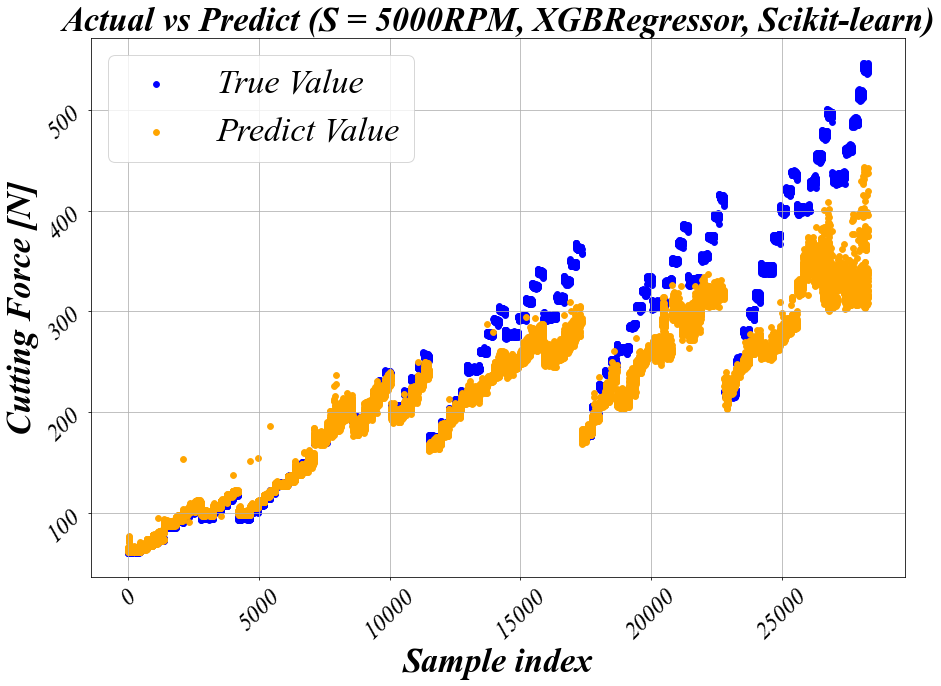

In [46]:
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig = plt.figure(figsize=(15,10),dpi=70)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'italic'
plt.title('Actual vs Predict (S = 5000RPM, XGBRegressor, Scikit-learn)',**tfont)
plt.scatter(range(0, len(y_test)), y_test, label='True Value', color = 'blue')
#plt.ylim((0,300))
plt.scatter(range(0, len(XGB_test_pred)), XGB_test_pred, label='Predict Value', color = 'orange')
plt.xlabel(r'Sample index',**lfont)
plt.ylabel(r'Cutting Force [N]',**lfont)
plt.tick_params(labelrotation=45, labelsize=25)
plt.grid()
plt.legend(fontsize = 35)
plt.show()
#fig.savefig("Bi-directional LSTM Prediction.svg")

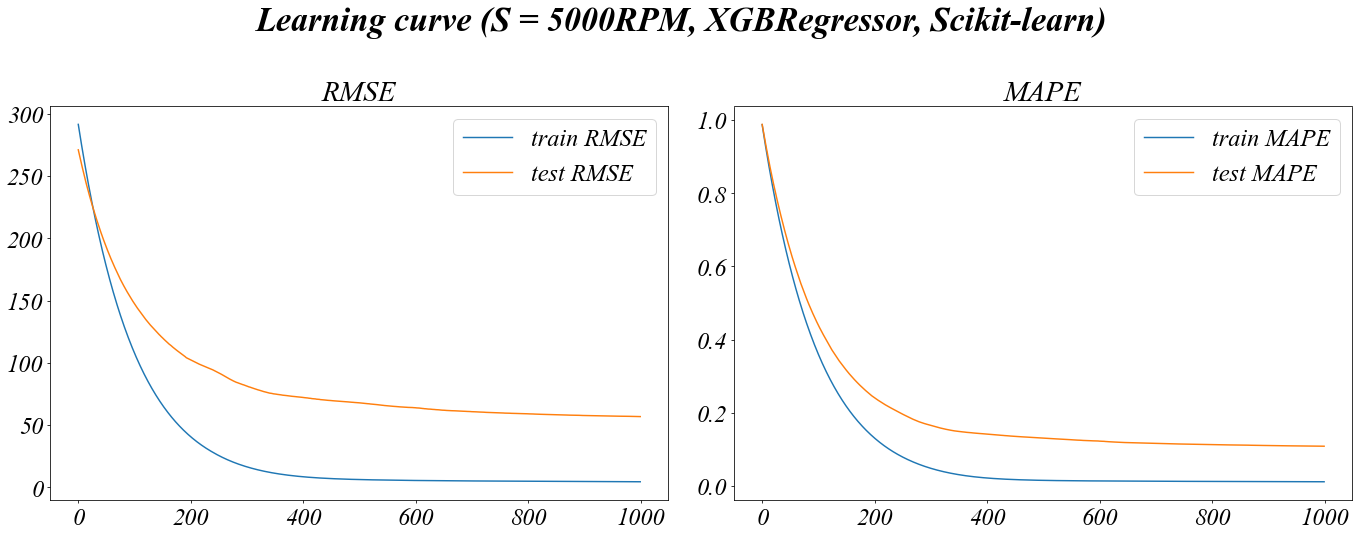

In [47]:
results = xgb.evals_result() # 학습 결과 가져오기


train_rmse = results['validation_0']['rmse']
test_rmse = results['validation_1']['rmse']

train_mape = results['validation_0']['mape']
test_mape = results['validation_1']['mape']

#학습곡선 그리기
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8),dpi=70)

ax[0].set_title("RMSE")
ax[1].set_title("MAPE")

ax[0].plot(train_rmse, label='train RMSE')
ax[0].plot(test_rmse, label='test RMSE')
ax[0].legend()

ax[1].plot(train_mape, label='train MAPE')
ax[1].plot(test_mape, label='test MAPE')
ax[1].legend()

fig.suptitle('Learning curve (S = 5000RPM, XGBRegressor, Scikit-learn)',**tfont)
fig.tight_layout() # 사용하면 플롯간 여백을 조정해준다. 
plt.show()
fig.savefig("./plot/Learning curve rpm 5000_cycle.png")